In [1]:
#install Packages
!pip install xgboost
!pip install lightgbm
!pip install scikit-plot
!pip install scipy==1.11.4
!pip install dalex
!pip install nbformat
!pip install dask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dalex: filename=dalex-1.7.1-py3-none-any.whl size=1042797 sha256=c09ca0ad9ba8624fc4aaadda22572bf5dc3feb43984f84ff05184de45d7afbd6
  Stored in directory: /root/.cache/pip/wheels/fe/c2/41/63e006b3312a4e17299bed5f83d985dea872368f9ab16bb20f
Successfully built dalex


In [2]:
#===== Set Up Library =====
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt

#---- Classification -----
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# import dalex to explain complex model
import dalex as dx

#-----------------------
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, make_scorer
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, ConfusionMatrixDisplay

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [3]:
# Google Colab
from google.colab import drive
drive.mount('/content/drive')
dir = "/content/drive/MyDrive/dibimbing.id/Project/Credit Score Classification/"

Mounted at /content/drive


In [4]:
# Local
# dir = '/Users/yokiwahyudi/Library/CloudStorage/GoogleDrive-oki.machine@gmail.com/My Drive/dibimbing.id/Project/Credit Score Classification/'

##Data Description

https://www.kaggle.com/datasets/parisrohan/credit-score-classification
```
- ID : Represents a unique identification of an entry
- Customer_ID : Represents a unique identification of a person
- Month : Represents the month of the year
- Name : Represents the name of a person
- Age : Represents the age of the person
- SSN : Represents the social security number of a person
- Occupation : Represents the occupation of the person
- Annual_Income : Represents the annual income of the person
- Monthly_Inhand_Salary : Represents the monthly base salary of a person
- Num_Bank_Accounts : Represents the number of bank accounts a person holds
- Num_Credit_Card : Represents the number of other credit cards held by a person
- Interest_Rate : Represents the interest rate on credit card
- Num_of_Loan : Represents the number of loans taken from the bank
- Type_of_Loan : Represents the types of loan taken by a person
- Delay_from_due_date : Represents the average number of days delayed from the payment date
- Num_of_Delayed_Payment : Represents the average number of payments delayed by a person
- Changed_Credit_Limit : Represents the percentage change in credit card limit
- Num_Credit_Inquiries : Represents the number of credit card inquiries
- Credit_Mix : Represents the classification of the mix of credits
- Outstanding_Debt : Represents the remaining debt to be paid (in USD)
- Credit_Utilization_Ratio : Represents the utilization ratio of credit card
- Credit_History_Age : Represents the age of credit history of the person
- Payment_of_Min_Amount : Represents whether only the minimum amount was paid by the person
- Total_EMI_per_month : Represents the monthly Equated Monthly Installment (EMI) payments (in USD)
- Amount_invested_monthly : Represents the monthly amount invested by the customer (in USD)
- Payment_Behaviour : Represents the payment behavior of the customer (in USD)
- Monthly_Balance : Represents the monthly balance amount of the customer (in USD)
- credit_score : Represents the bracket of credit score (Poor, Standard, Good)
```
**Tujuan Bisnis:**\
Tujuan dari proyek ini adalah membangun model prediksi yang dapat menilai atau mengklasifikasikan nasabah ke dalam tiga kategori yaitu: Poor, Standard, dan Good berdasarkan data historis.

In [5]:
pd.set_option('display.max_columns', None)
df = pd.read_csv(dir + 'credit_score_cleaned_train.csv')
df.head()

id customer_id     month           name  age          ssn occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh   23  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   annual_income  monthly_inhand_salary  total_emi_per_month  \
0       19114.12              1824.8434            49.574947   
1       19114.12              1824.8434            49.574947   
2       19114.12              1824.8434            49.574947   
3       19114.12              1824.8434            49.574947   
4       19114.12              1824.8434            49.574947   

   num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                  3                4              3            4   
1                  3                4              3            4   
2                  3                4              3            4   
3                  3                4              3            4   
4                  3                4              3            4   

                                        type_of_loan  delay_from_due_date  \
0  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    3   
1  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                   -1   
2  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    3   
3  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    5   
4  ['Auto Loan', 'Credit-Builder Loan', 'Personal...                    6   

   num_of_delayed_payment  changed_credit_limit  num_credit_inquiries  \
0                       7                 11.27                     4   
1                       7                 11.27                     4   
2                       7                 11.27                     4   
3                       4                  6.27                     4   
4                       4                 11.27                     4   

  credit_mix  outstanding_debt  credit_utilization_ratio  credit_history_age  \
0       Good            809.98                 26.822620                 265   
1       Good            809.98                 31.944960                 266   
2       Good            809.98                 28.609352                 267   
3       Good            809.98                 31.377861                 268   
4       Good            809.98                 24.797346                 269   

  payment_of_min_amount  amount_invested_monthly  \
0                    No                80.415300   
1                    No               118.280220   
2                    No                81.699524   
3                    No               199.458070   
4                    No                41.420155   

                  payment_behaviour  monthly_balance  credit_score  
0   High_spent_Small_value_payments        312.49408             2  
1    Low_spent_Large_value_payments        284.62915             2  
2   Low_spent_Medium_value_payments        331.20987             2  
3    Low_spent_Small_value_payments        223.45131             2  
4  High_spent_Medium_value_payments        341.48923             2

In [6]:
# df[['type_of_loan','num_bank_accounts','num_credit_card','interest_rate','num_of_loan','delay_from_due_date',
#     'num_of_delayed_payment','changed_credit_limit']]

## Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        100000 non-null  object 
 1   customer_id               100000 non-null  object 
 2   month                     100000 non-null  object 
 3   name                      100000 non-null  object 
 4   age                       100000 non-null  int64  
 5   ssn                       100000 non-null  object 
 6   occupation                100000 non-null  object 
 7   annual_income             100000 non-null  float64
 8   monthly_inhand_salary     100000 non-null  float64
 9   total_emi_per_month       100000 non-null  float64
 10  num_bank_accounts         100000 non-null  int64  
 11  num_credit_card           100000 non-null  int64  
 12  interest_rate             100000 non-null  int64  
 13  num_of_loan               100000 non-null  in

In [8]:
# Seperate between Categorical and Numerical Columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Categorical Columns: ",cat_cols)
print("Numerical Columns: ",num_cols)

Categorical Columns:  ['id', 'customer_id', 'month', 'name', 'ssn', 'occupation', 'type_of_loan', 'credit_mix', 'payment_of_min_amount', 'payment_behaviour']
Numerical Columns:  ['age', 'annual_income', 'monthly_inhand_salary', 'total_emi_per_month', 'num_bank_accounts', 'num_credit_card', 'interest_rate', 'num_of_loan', 'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit', 'num_credit_inquiries', 'outstanding_debt', 'credit_utilization_ratio', 'credit_history_age', 'amount_invested_monthly', 'monthly_balance', 'credit_score']


## Data Cleaning

### Missing Value Handling

In [9]:
# Find Missing Values
df.isna().sum()

id                          0
customer_id                 0
month                       0
name                        0
age                         0
ssn                         0
occupation                  0
annual_income               0
monthly_inhand_salary       0
total_emi_per_month         0
num_bank_accounts           0
num_credit_card             0
interest_rate               0
num_of_loan                 0
type_of_loan                0
delay_from_due_date         0
num_of_delayed_payment      0
changed_credit_limit        0
num_credit_inquiries        0
credit_mix                  0
outstanding_debt            0
credit_utilization_ratio    0
credit_history_age          0
payment_of_min_amount       0
amount_invested_monthly     0
payment_behaviour           0
monthly_balance             0
credit_score                0
dtype: int64

### Duplicate Value Handling

In [10]:
# Find duplicate values
df['id'].duplicated().sum()

0

### Looking For WhiteSpace (" ")

In [11]:
# Find whitespace
# cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
for cat in cat_cols:
  print(f"Whitespace of {cat} = ", df[cat][df[cat] == ' '].sum())

Whitespace of id =  0
Whitespace of customer_id =  0
Whitespace of month =  0
Whitespace of name =  0
Whitespace of ssn =  0
Whitespace of occupation =  0
Whitespace of type_of_loan =  0
Whitespace of credit_mix =  0
Whitespace of payment_of_min_amount =  0
Whitespace of payment_behaviour =  0


### Inconsistent Text and Typos

In [12]:
# Find Typos for "month"
df['month'].value_counts()

month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64

In [13]:
# Find Typos for "occupation"
df['occupation'].value_counts().reset_index()

occupation  count
0          Lawyer   7096
1        Engineer   6864
2       Architect   6824
3        Mechanic   6776
4       Scientist   6744
5      Accountant   6744
6       Developer   6720
7   Media_Manager   6720
8         Teacher   6672
9    Entrepreneur   6648
10         Doctor   6568
11     Journalist   6536
12        Manager   6432
13       Musician   6352
14         Writer   6304

In [14]:
# Find Typos for "credit_mix"
df['credit_mix'].value_counts()

credit_mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

In [15]:
# Find Typos for "payment_of_min_amount"
df['payment_of_min_amount'].value_counts()

payment_of_min_amount
Yes    59432
No     40568
Name: count, dtype: int64

In [16]:
# Find Typos for "payment_behaviour"
df['payment_behaviour'].value_counts()

payment_behaviour
Low_spent_Small_value_payments      27588
High_spent_Medium_value_payments    19015
Low_spent_Medium_value_payments     15012
High_spent_Large_value_payments     14839
High_spent_Small_value_payments     12244
Low_spent_Large_value_payments      11302
Name: count, dtype: int64

In [17]:
# Find Typos for "num_of_delayed_payment"
df['num_of_delayed_payment'].value_counts()

num_of_delayed_payment
19    5929
17    5810
16    5775
10    5744
15    5691
18    5658
20    5526
12    5514
9     5373
8     5256
11    5226
14    4534
13    4408
21    2780
7     2568
22    2546
6     2535
5     2267
23    2203
3     2129
2     2102
4     2012
0     2012
1     2008
24    1822
25    1809
26     350
27     270
28     143
Name: count, dtype: int64

## Data Manipulation

### Melihat Credit Score Berdasarkan rata - rata monthly_inhand_salary dan total_emi_per_month

In [18]:
# looking at credit score based on monthly_inhand_salary and total_emi_per_month average
df.groupby('credit_score').agg({
    'monthly_inhand_salary': ['min','mean','max'],
    'total_emi_per_month': ['min','mean','max']
}).reset_index()

credit_score monthly_inhand_salary                          \
                                 min         mean        max   
0            0             319.55624  3381.389043  15167.180   
1            1             303.64542  4240.739011  15204.634   
2            2             332.12833  5403.106703  15204.634   

  total_emi_per_month                         
                  min        mean        max  
0                 0.0  110.543464  1634.2133  
1                 0.0  100.451019  3776.0000  
2                 0.0  121.014125  2523.0000

**Insight**: Semakin tinggi nilai "total_emi_per_month", maka samakin baik pula "credit_score" nya

### Melihat Credit Score Berdasarkan nilai minimum, rata - rata, dan maximum monthly_inhand_salary dan total_emi_per_month

In [19]:
# Function to count loans, treating 'No Loan' as 0
def count_loans(loan_list):
    # Convert string representation to list
    loan_list = eval(loan_list)
    for loan in loan_list:
        my_loan = loan.replace('[','').replace(']','').replace("'",'').strip()
    return len([loan for loan in loan_list if loan != 'No Loan'])

# type_of_loan = df['type_of_loan'].apply(count_loans)
# type_of_loan[type_of_loan == 0]

In [20]:
# looking at credit_score by type_of_loan amount
df_loan = df[['id','type_of_loan','credit_score']]
df_loan['num_loan'] = df_loan['type_of_loan'].apply(count_loans)
df_loan.groupby('credit_score').agg({'num_loan': ['min','mean','max']})

num_loan              
                  min      mean max
credit_score                       
0                   0  4.755742   9
1                   0  3.312164   9
2                   0  2.202154   9

**Insight**: Semakin kecil rata-rata total pinjamannya "num_loan" semakin baik pula nilai "credit_score" nya

### Menghitung persentase credit_score terbaik untuk tiap credit_mix

In [21]:
# Calculate the good credit_score percentage for each Credit Mix.
crm = pd.crosstab(df['credit_mix'],
                  df['credit_score']
                ).apply(lambda r: (r * 100) / r.sum(), axis=1)
crm[2] = crm[2].astype(int)
crm = crm.drop([0,1], axis=1)
crm.rename(columns={2: 'Good Percentage (%)'}, inplace=True)
crm

credit_score  Good Percentage (%)
credit_mix                       
Bad                             1
Good                           48
Standard                        5

**Insight**: Semakin baik credit_mix nya, maka semakin baik pula credit_score nya

### Menghitung tiap kelas credit_score untuk tiap Occupation

In [22]:
# Calculate the good credit_score percentage for each Occupation.
occ = pd.crosstab(df['occupation'],
                  df['credit_score']
                )
# occ[2] = occ[2].astype(int)
# occ = occ.drop([0,1], axis=1)
occ.rename(columns={0:'Poor', 1:'Standard', 2: 'Good'}, inplace=True)
occ

credit_score   Poor  Standard  Good
occupation                         
Accountant     2037      3502  1205
Architect      1855      3736  1233
Developer      1924      3586  1210
Doctor         1804      3600  1164
Engineer       2094      3506  1264
Entrepreneur   2033      3430  1185
Journalist     1840      3442  1254
Lawyer         1965      3872  1259
Manager        1856      3386  1190
Mechanic       2044      3625  1107
Media_Manager  1764      3712  1244
Musician       1786      3374  1192
Scientist      2062      3481  1201
Teacher        2027      3421  1224
Writer         1907      3501   896

**Insight**: Profesi Journalist memiliki presentase credit score "Good" tertinggi dengan nilai 19%. Tapi perbedaannya tidak terlalu mencolok dengan profesi lainnya.

### Perbandingan tiap occupation terhadap credit_score berdasarkan rata-rata annual_income

In [23]:
cso = pd.pivot_table(df,
               index='occupation',
               columns='credit_score',
               values='annual_income',
               aggfunc='mean'
              ).sort_values('occupation', ascending=False)
cso.rename(columns={0:'Poor',1:'Standard',2:'Good'}, inplace=True)
cso.sort_values('Good', ascending=False)

credit_score           Poor      Standard          Good
occupation                                             
Mechanic       38385.509447  50963.164434  68873.528615
Musician       41364.826518  50511.915359  68765.962691
Writer         40241.424585  52492.875277  68400.078568
Scientist      41614.474816  51077.477811  67992.473831
Architect      38469.544063  53213.593467  67989.203143
Developer      40837.364874  49706.714872  66151.758198
Engineer       41890.244821  50679.391741  65518.267181
Entrepreneur   42883.283049  50865.780830  65244.620100
Accountant     40620.274273  51907.541722  64376.138612
Manager        42422.963689  51942.676814  64217.920912
Teacher        39788.200051  50911.226015  63628.721115
Media_Manager  38838.177973  52191.501555  62629.018523
Doctor         39477.483348  50435.375134  62240.421985
Journalist     41268.995492  47385.178483  61805.679441
Lawyer         40385.094575  50364.494931  61598.515639

**Insight**: Semakin tinggi penghasilan tahunan tiap profesi, semakin baik pula credit score-nya.

### Analisis age dan credit_score berdasarkan rata-rata num_of_loan

In [24]:
age = pd.pivot_table(df,
               index='age',
               columns='credit_score',
               values='num_of_loan',
               aggfunc='mean'
              ).sort_values('age', ascending=False)
age.rename(columns={0:'Poor',1:'Standard',2:'Good'}, inplace=True)
age.sort_values('Good', ascending=True)

credit_score      Poor  Standard      Good
age                                       
51            1.873239  1.979893  1.800000
55            2.238095  1.909209  1.828452
53            1.934911  1.896000  1.848101
48            2.061350  2.066581  1.916840
52            2.437126  1.985733  1.926829
49            1.979866  1.842384  1.962745
46            3.894389  2.469388  1.968487
42            4.735149  3.333100  1.992611
54            2.011364  1.857939  2.020179
22            4.867397  3.354839  2.039749
43            4.847296  3.501311  2.071429
19            4.923404  3.553596  2.094298
56            1.851064  2.241860  2.100000
33            4.674967  3.362193  2.109244
50            2.304054  2.190014  2.113895
35            4.584885  3.325397  2.119691
40            5.041032  3.531065  2.133197
45            4.906553  3.300476  2.138756
20            4.816688  3.496774  2.163306
23            4.953165  3.335349  2.165919
39            4.835373  3.612797  2.175889
30            4.792148  3.330677  2.190255
37            5.262570  3.593422  2.190476
29            5.194790  3.255222  2.212346
47            2.113514  1.940233  2.223077
41            4.837181  3.224801  2.251880
36            5.075669  3.568240  2.274621
26            4.822292  3.455909  2.278846
27            4.725591  3.160943  2.307851
28            4.823289  3.410506  2.330827
34            5.109544  3.435388  2.332649
32            4.532184  3.537725  2.340326
21            4.937286  3.424284  2.395143
38            4.561247  3.611923  2.397436
25            5.050592  3.412719  2.433684
31            4.785482  3.667681  2.442105
24            4.593202  3.337358  2.500000
18            5.122013  3.815444  2.547009
44            4.865340  3.350503  2.554566
17            5.250000  4.831218  3.426230
16            5.325758  4.861286  3.688889
14            5.357627  4.885906  4.592593
15            5.383838  4.793388  5.410959

**Insight**: Hampir disetiap kalangan usia, semakin tinggi "credit_score"-nya, semakin kecil juga nilai rata-rata dari "num_of_loan" nya. Kecuali untuk usia 15, 47, 56.

## Simple EDA

### Descriptive Statistics

In [25]:
# Numerical Columns Statistics
df[num_cols].describe().T

count          mean           std         min  \
age                       100000.0     33.309240     10.764996    14.00000   
annual_income             100000.0  50505.123439  38299.422075  7005.93000   
monthly_inhand_salary     100000.0   4198.771620   3187.494355   303.64542   
total_emi_per_month       100000.0    107.043617    130.035096     0.00000   
num_bank_accounts         100000.0      5.368800      2.593279     0.00000   
num_credit_card           100000.0      5.533640      2.067073     0.00000   
interest_rate             100000.0     14.532080      8.741330     1.00000   
num_of_loan               100000.0      3.532880      2.446356     0.00000   
delay_from_due_date       100000.0     21.068780     14.860104    -5.00000   
num_of_delayed_payment    100000.0     13.334050      6.271409     0.00000   
changed_credit_limit      100000.0     10.389303      6.789784    -6.49000   
num_credit_inquiries      100000.0      5.772820      3.861137     0.00000   
outstanding_debt          100000.0   1426.220376   1155.129026     0.23000   
credit_utilization_ratio  100000.0     32.285173      5.116875    20.00000   
credit_history_age        100000.0    221.206880     99.681112     1.00000   
amount_invested_monthly   100000.0    637.633413   2043.334171     0.00000   
monthly_balance           100000.0    403.120320    214.014558     0.00776   
credit_score              100000.0      0.888300      0.675120     0.00000   

                                   25%           50%           75%  \
age                          24.000000     33.000000     42.000000   
annual_income             19342.972500  36999.705000  71683.470000   
monthly_inhand_salary      1626.761700   3096.378400   5961.745000   
total_emi_per_month          29.197023     66.403020    146.827450   
num_bank_accounts             3.000000      5.000000      7.000000   
num_credit_card               4.000000      5.000000      7.000000   
interest_rate                 7.000000     13.000000     20.000000   
num_of_loan                   2.000000      3.000000      5.000000   
delay_from_due_date          10.000000     18.000000     28.000000   
num_of_delayed_payment        9.000000     14.000000     18.000000   
changed_credit_limit          5.320000      9.400000     14.860000   
num_credit_inquiries          3.000000      5.000000      8.000000   
outstanding_debt            566.072500   1166.155000   1945.962500   
credit_utilization_ratio     28.052567     32.305783     36.496664   
credit_history_age          144.000000    219.000000    302.000000   
amount_invested_monthly      74.593977    135.952230    266.178185   
monthly_balance             270.189028    337.114475    471.570645   
credit_score                  0.000000      1.000000      1.000000   

                                  max  
age                           56.0000  
annual_income             179987.2800  
monthly_inhand_salary      15204.6340  
total_emi_per_month         3776.0000  
num_bank_accounts             11.0000  
num_credit_card               11.0000  
interest_rate                 34.0000  
num_of_loan                    9.0000  
delay_from_due_date           67.0000  
num_of_delayed_payment        28.0000  
changed_credit_limit          36.9700  
num_credit_inquiries          17.0000  
outstanding_debt            4998.0700  
credit_utilization_ratio      50.0000  
credit_history_age           404.0000  
amount_invested_monthly    10000.0000  
monthly_balance             1602.0405  
credit_score                   2.0000

In [26]:
# Categorical Columns Statistics
df[cat_cols].describe()

id customer_id    month    name          ssn occupation  \
count   100000      100000   100000  100000       100000     100000   
unique  100000       12500        8   10139        12500         15   
top     0x1602   CUS_0xd40  January  Langep  821-00-0265     Lawyer   
freq         1           8    12500      48            8       7096   

       type_of_loan credit_mix payment_of_min_amount  \
count        100000     100000                100000   
unique         6261          3                     2   
top     ['No Loan']   Standard                   Yes   
freq          11408      45848                 59432   

                     payment_behaviour  
count                           100000  
unique                               6  
top     Low_spent_Small_value_payments  
freq                             27588

### Perbandingan kelas credit_score (Target)

In [27]:
# Check Imbalanced target
df['credit_score'].value_counts()

credit_score
1    53174
0    28998
2    17828
Name: count, dtype: int64

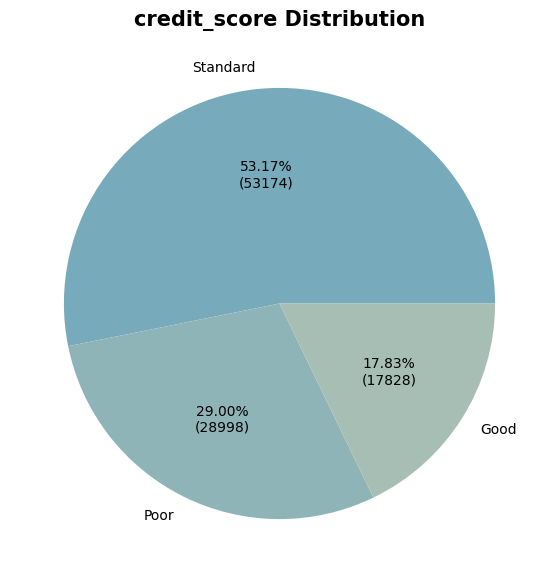

In [28]:
# Credit score counts exploration
df_cs = df['credit_score'].value_counts().reset_index()
df_cs['credit_score'] = df_cs['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})
total = len(df['credit_score'])
pct_fmt = lambda x: '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.figure(figsize=(10, 7))
palette_color = sns.color_palette('blend:#7AB,#EDA')
plt.pie(df_cs['count'], labels=df_cs['credit_score'], colors=palette_color, autopct=pct_fmt)
plt.title('credit_score Distribution',weight='bold',fontsize=15)
plt.show()

**Insight**: Dari total 100000 baris data kredit, dibagi menjadi 3 kelas dengan persentase: `Good = 17.83%`, `Standard = 53.17%`, `Bad = 29.00%`.

### Apakah ada hubungan antara pemasukan tahunan, sisa tagihan, dan credit score

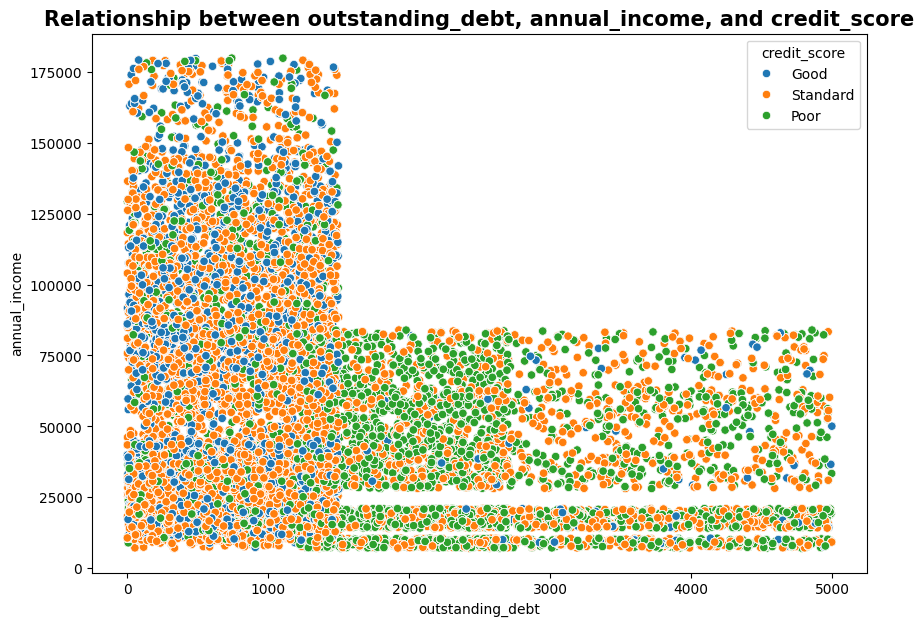

In [29]:
dtc = df[['outstanding_debt','annual_income','credit_score']]
dtc['credit_score'] = dtc['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=dtc,
                x="outstanding_debt",
                y="annual_income",
                hue="credit_score")
plt.title('Relationship between outstanding_debt, annual_income, and credit_score',weight='bold',fontsize=15)
plt.show()

**Interpretasi**: Tidak ada korelasi yang jelas dari ketiga fitur diatas, karena tidak persebaran titik tidak membentuk pola tertentu.

### Apakah ada hubungan antara penghasilan bulanan, total angsuran perbulan, dan credit score

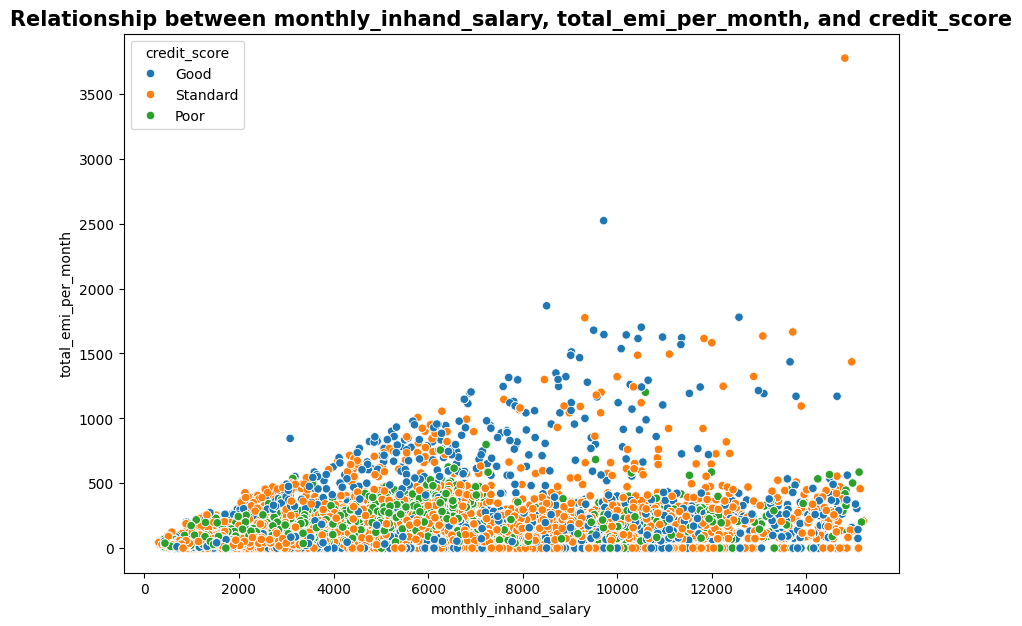

In [30]:
dtc = df[['monthly_inhand_salary','total_emi_per_month','credit_score']]
dtc['credit_score'] = dtc['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=dtc,
                x="monthly_inhand_salary",
                y="total_emi_per_month",
                hue="credit_score")
plt.title('Relationship between monthly_inhand_salary, total_emi_per_month, and credit_score',weight='bold',fontsize=15)
plt.show()

**Interpretasi**: Semakin tinggi penghasilan bulanan semakin tinggi pula total angsuran yang harus dibayarkan. Tapi kedua variable tersebut cenderung tidak berpengaruh pada credit score.

### Apakah ada hubungan antara sisa hutang yang harus dibayar, total angsuran perbulan, dan credit score

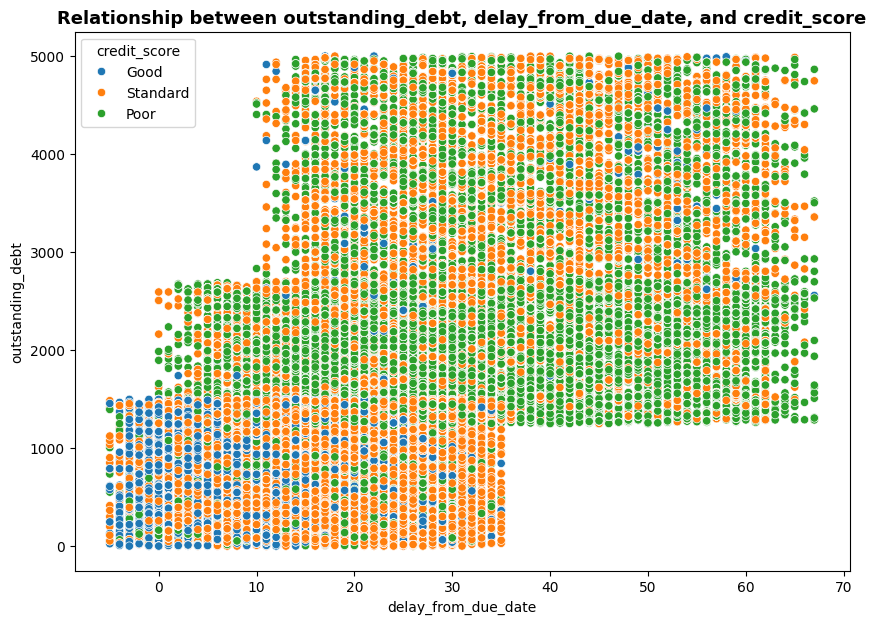

In [31]:
df_oi = df[['outstanding_debt','delay_from_due_date','credit_score']]
df_oi['credit_score'] = df_oi['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_oi,
                x="delay_from_due_date",
                y="outstanding_debt",
                hue="credit_score")
plt.title('Relationship between outstanding_debt, delay_from_due_date, and credit_score',weight='bold',fontsize=13)
# plt.xlabel('Count')
# plt.ylabel('Occupations')
plt.show()

**Interpretasi**:
- "credit_score" "Good", dan "Standard" cenderung memiliki nilai "outstanding_debt" yang lebih rendah, bahkan saat "delay_from_due_date" meningkat.
- Nasabah dengan skor kredit baik cenderung lebih disiplin dalam membayar utang.

### Distribusi credit score terhadap usia

<ipython-input-32-b99c5842e505>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y='age', data=df_agcs, palette="blend:#7AB,#EDA")


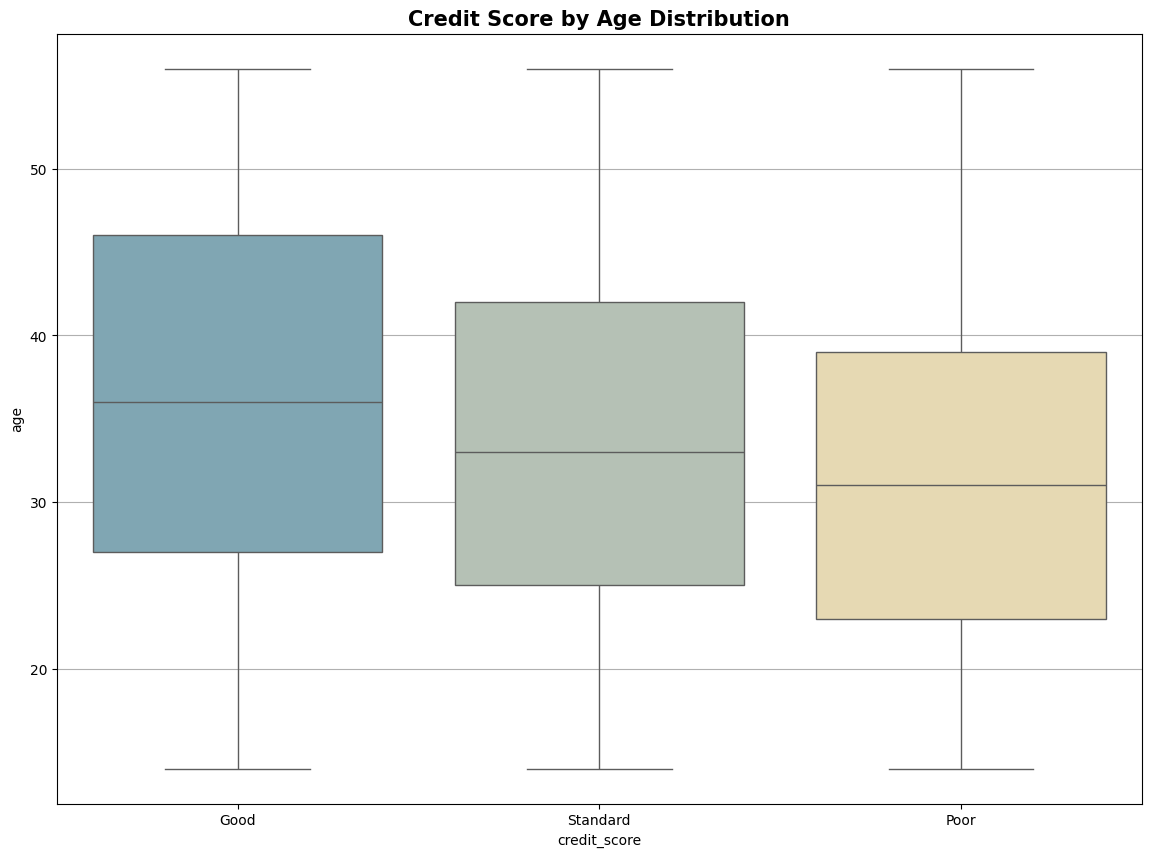

In [32]:
df_agcs = df[['age','credit_score']]
df_agcs['credit_score'] = df_agcs['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})

plt.figure(figsize=(14, 10))
sns.boxplot(x='credit_score', y='age', data=df_agcs, palette="blend:#7AB,#EDA")
plt.title('Credit Score by Age Distribution', weight='bold', fontsize=15)
plt.grid(axis = 'y')
plt.show()

**Interpretasi**: Semakin tinggi usia nasabah, maka semakin baik pula credit scorenya.

### Distribusi credit score terhadap jumlah pinjaman

<ipython-input-33-c2e0bd30b3ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='credit_score', y='num_of_loan', data=df_agcs, palette="blend:#7AB,#EDA")


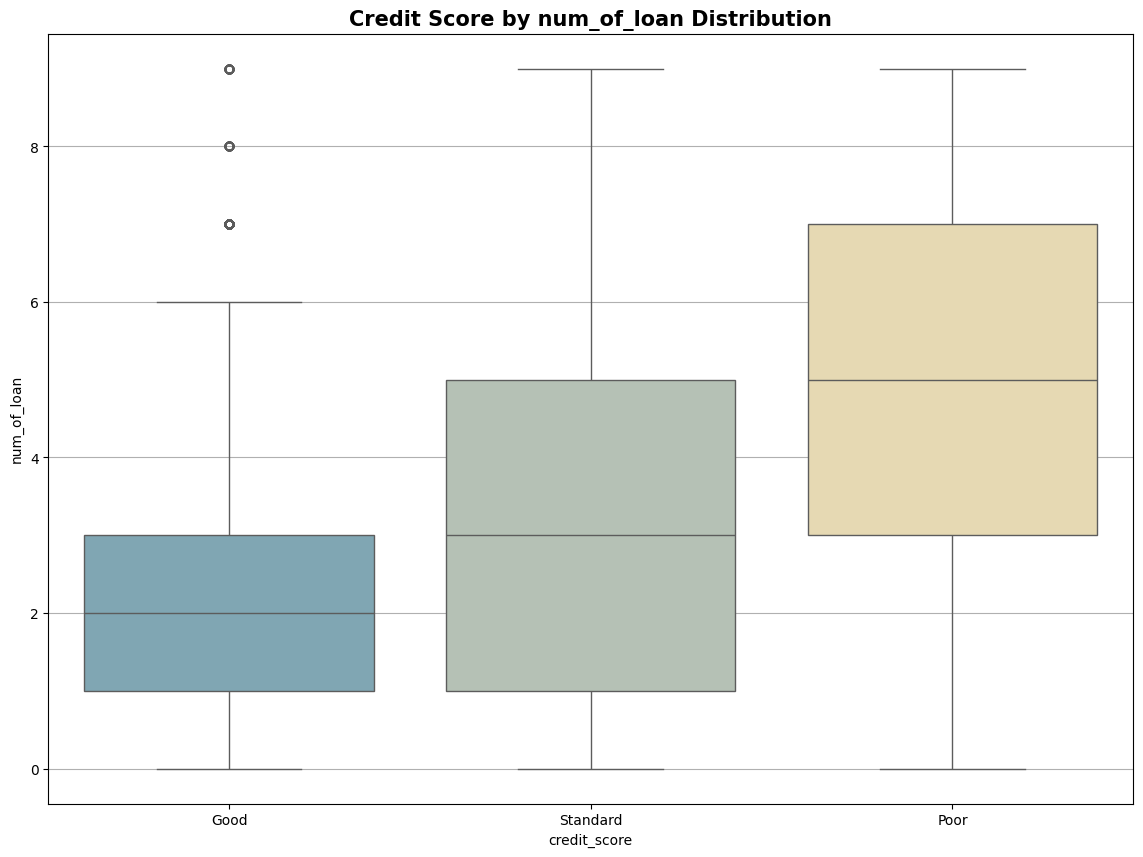

In [33]:
df_agcs = df[['num_of_loan','credit_score']]
df_agcs['credit_score'] = df_agcs['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})

plt.figure(figsize=(14, 10))
sns.boxplot(x='credit_score', y='num_of_loan', data=df_agcs, palette="blend:#7AB,#EDA")
plt.title('Credit Score by num_of_loan Distribution', weight='bold', fontsize=15)
plt.grid(axis = 'y')
plt.show()

**Interpretasi**: Nasabah yang memiliki jumlah pinjaman yang lebih sedikit, cenderung memiliki credit score yang lebih baik.

### Korelasi tiap fitur numerik

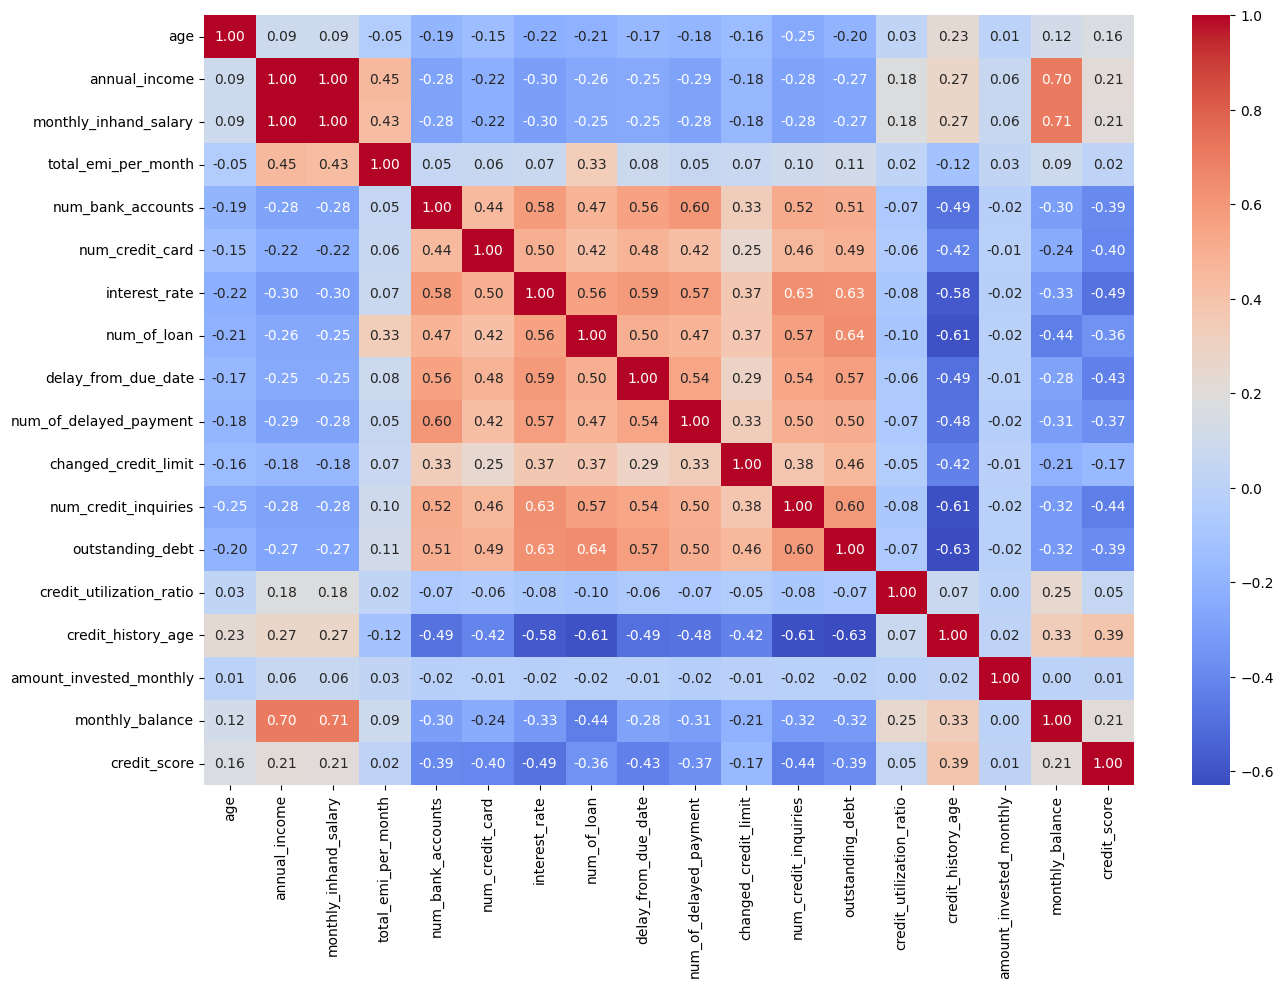

In [34]:
df_hm = df[num_cols]
corr = df_hm.corr()
# corr

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

**Interpretasi** : terdapat korelasi yang kuat antaa fitur `annual_income` dan `monthly_inhand_salary`. Salah satu akan dihapus karena berpotensi mempengaruhi akurasi prediksi.

### Perbandingan credit_score untuk tiap profesi (occupations)

In [35]:
# df['occupation'].value_counts()

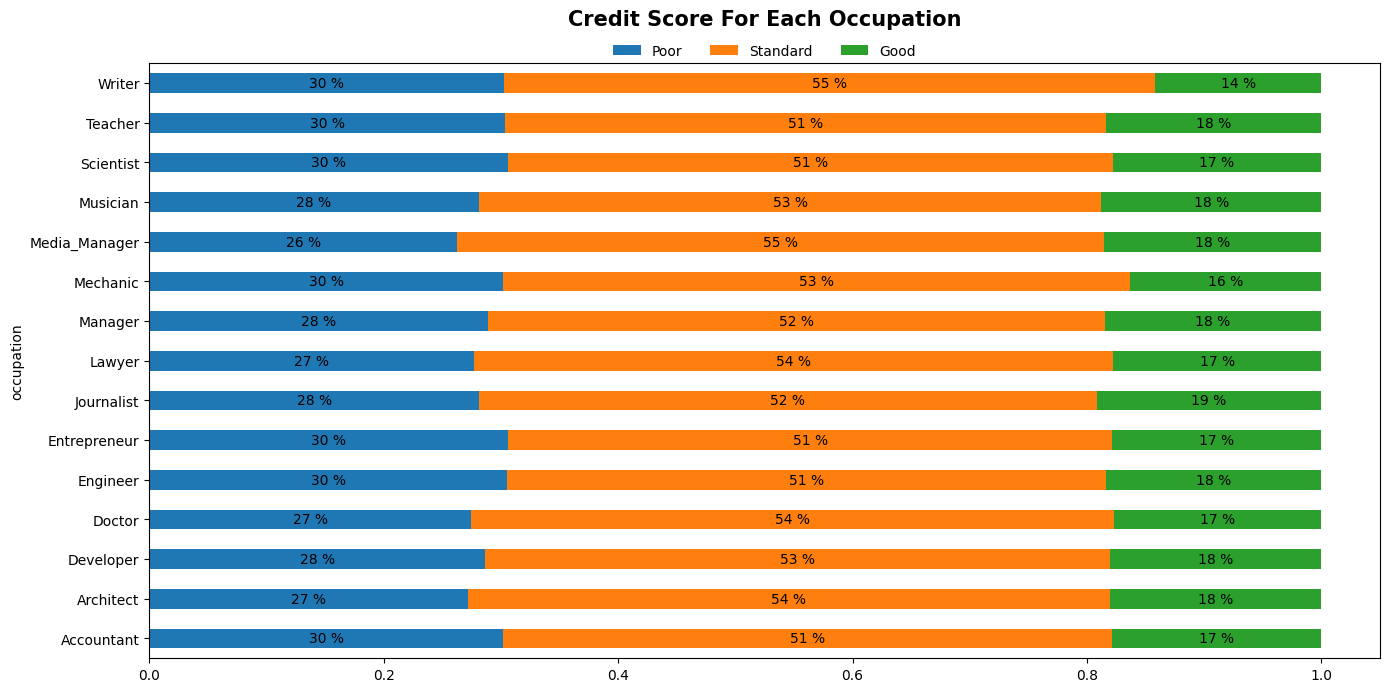

In [36]:
x_var, y_var = "occupation", "credit_score"
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.columns = ['Poor','Standard','Good']
df_grouped.plot.barh(stacked=True, figsize=(14, 7))
plt.legend(
    bbox_to_anchor=(0.5, 1.0),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    # print(ix, row)
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element

plt.title('Credit Score For Each Occupation',weight='bold',fontsize=15,x=0.5, y=1.05)
plt.tight_layout()

In [37]:
# for idx, row in df_grouped.reset_index(drop=True).iterrows():
#   print(row)

<ipython-input-38-0da6f19c4131>:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = totals[occupation]


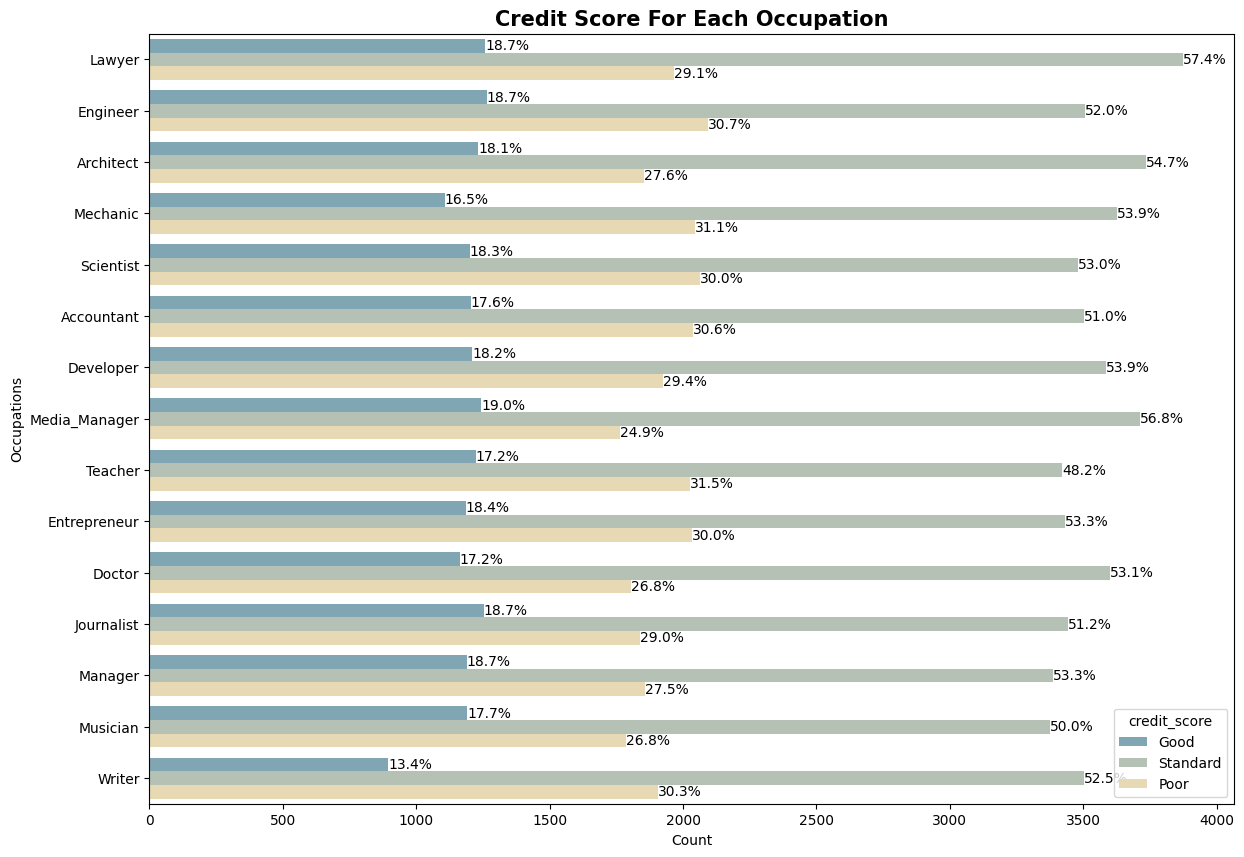

In [38]:
df_oc = df[['credit_score','occupation']]
df_oc['credit_score'] = df_oc['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})
totals = df.groupby('occupation').size()

plt.figure(figsize=(14, 10))
ax = sns.countplot(y='occupation',
                   hue='credit_score',
                   data=df_oc,
                   order=df_oc['occupation'].value_counts().index,
                   palette="blend:#7AB,#EDA")
# for container in ax.containers:
#     ax.bar_label(container, fmt='%d')
for container in ax.containers:
    labels = []
    for bar, count in zip(container, container.datavalues):
      occupation = int(bar.get_y())
      total = totals[occupation]
      percentage = f'{(count / total) * 100:.1f}%'
      labels.append(percentage)
    ax.bar_label(container, labels=labels)

plt.title('Credit Score For Each Occupation',weight='bold',fontsize=15)
plt.xlabel('Count')
plt.ylabel('Occupations')
plt.show()

**Insight**: Terdapat pola yang serupa untuk setiap profesi. Dimana di tiap profesi, 'credit_score' 'standard' adalah yang paling banyak, dan 'credit_score' 'Good' adalah yang paling sedikit.

### Perbandingan credit_score untuk tiap payment_behaviour

In [39]:
ttls = df.groupby('payment_behaviour').size()
ttls

payment_behaviour
High_spent_Large_value_payments     14839
High_spent_Medium_value_payments    19015
High_spent_Small_value_payments     12244
Low_spent_Large_value_payments      11302
Low_spent_Medium_value_payments     15012
Low_spent_Small_value_payments      27588
dtype: int64

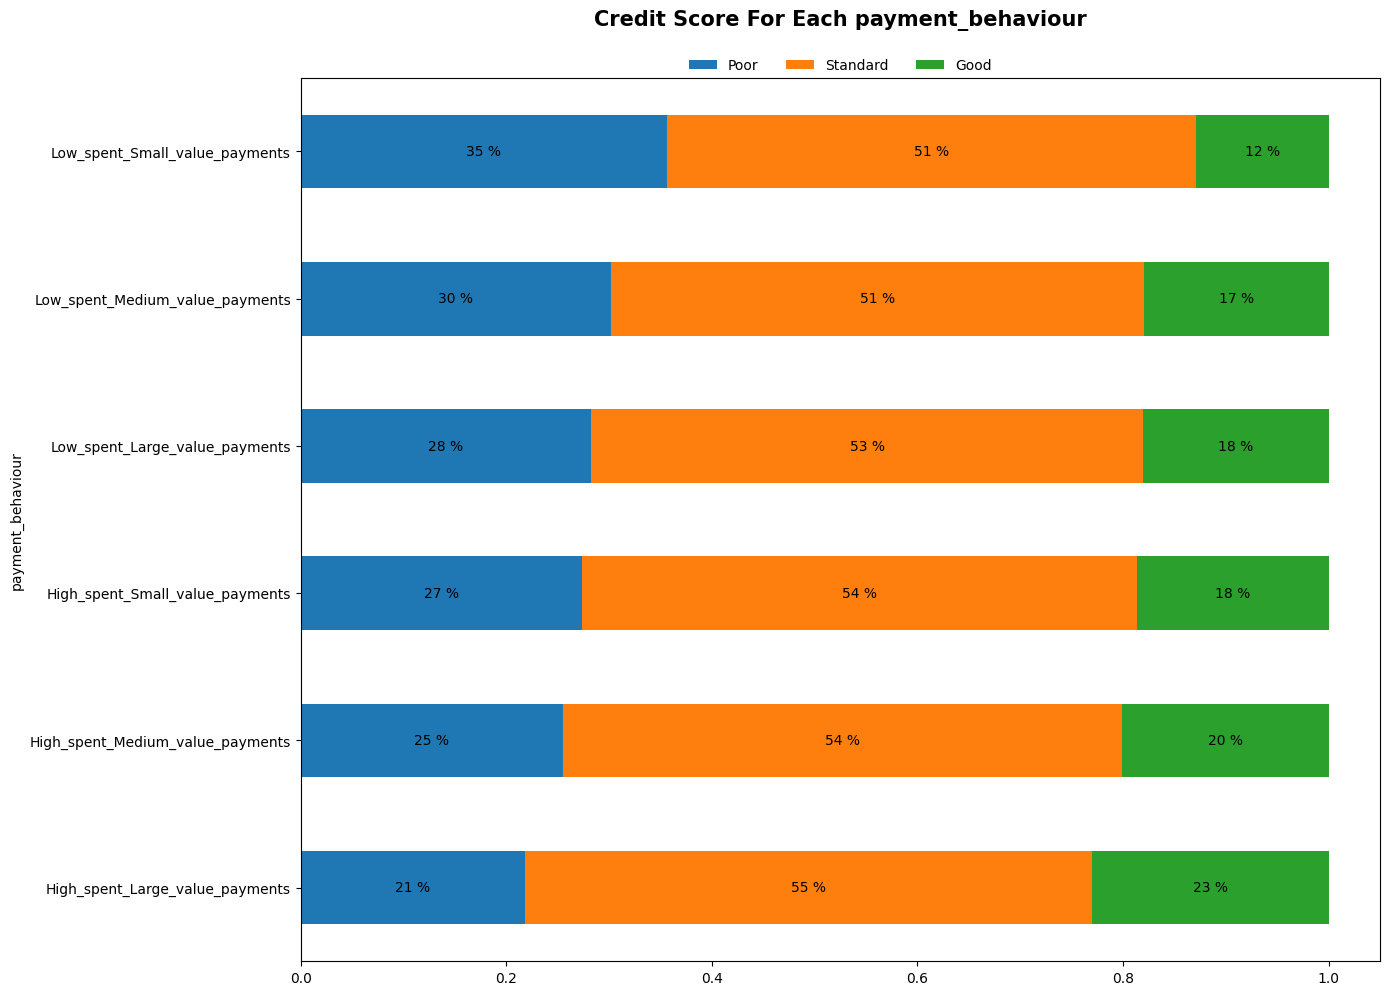

In [40]:
x_var, y_var = "payment_behaviour", "credit_score"
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.columns = ['Poor','Standard','Good']
df_grouped.plot.barh(stacked=True, figsize=(14, 10))
plt.legend(
    bbox_to_anchor=(0.5, 1.0),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=3,
)
for ix, row in df_grouped.reset_index(drop=True).iterrows():
    # print(ix, row)
    cumulative = 0
    for element in row:
        if element == element and element > 0.1:
            plt.text(
                cumulative + element / 2,
                ix,
                f"{int(element * 100)} %",
                va="center",
                ha="center",
            )
        cumulative += element

plt.title('Credit Score For Each payment_behaviour',weight='bold',fontsize=15,x=0.5, y=1.05)
plt.tight_layout()

In [41]:
# # Reset indeks dan persiapkan DataFrame untuk plotting manual
# df_grouped_reset = df_grouped.reset_index()

# # Iterasi setiap kolom untuk membuat bar plot horizontal
# fig, ax = plt.subplots(figsize=(14, 10))
# categories = df_grouped_reset[x_var]
# cumulative = [0] * len(categories)

# for col in df_grouped.columns:
#     ax.barh(categories, df_grouped_reset[col], left=cumulative, label=col)
#     cumulative = [cum + val for cum, val in zip(cumulative, df_grouped_reset[col])]

# # Menambahkan legenda
# plt.legend(
#     bbox_to_anchor=(1.02, 0.5),
#     loc="center left",
#     borderaxespad=0,
#     frameon=False,
#     ncol=1
# )

# # Menambahkan label persentase
# for i, row in df_grouped.iterrows():
#     cumulative = 0
#     for value in row:
#         if value > 0.1:  # Tampilkan hanya nilai >10%
#             plt.text(
#                 cumulative + value / 2,
#                 i,
#                 f"{int(value * 100)} %",
#                 va="center",
#                 ha="center"
#             )
#         cumulative += value

# plt.tight_layout()
# plt.show()

<ipython-input-42-fa60ec9c2945>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total = totals[payment_bhv]


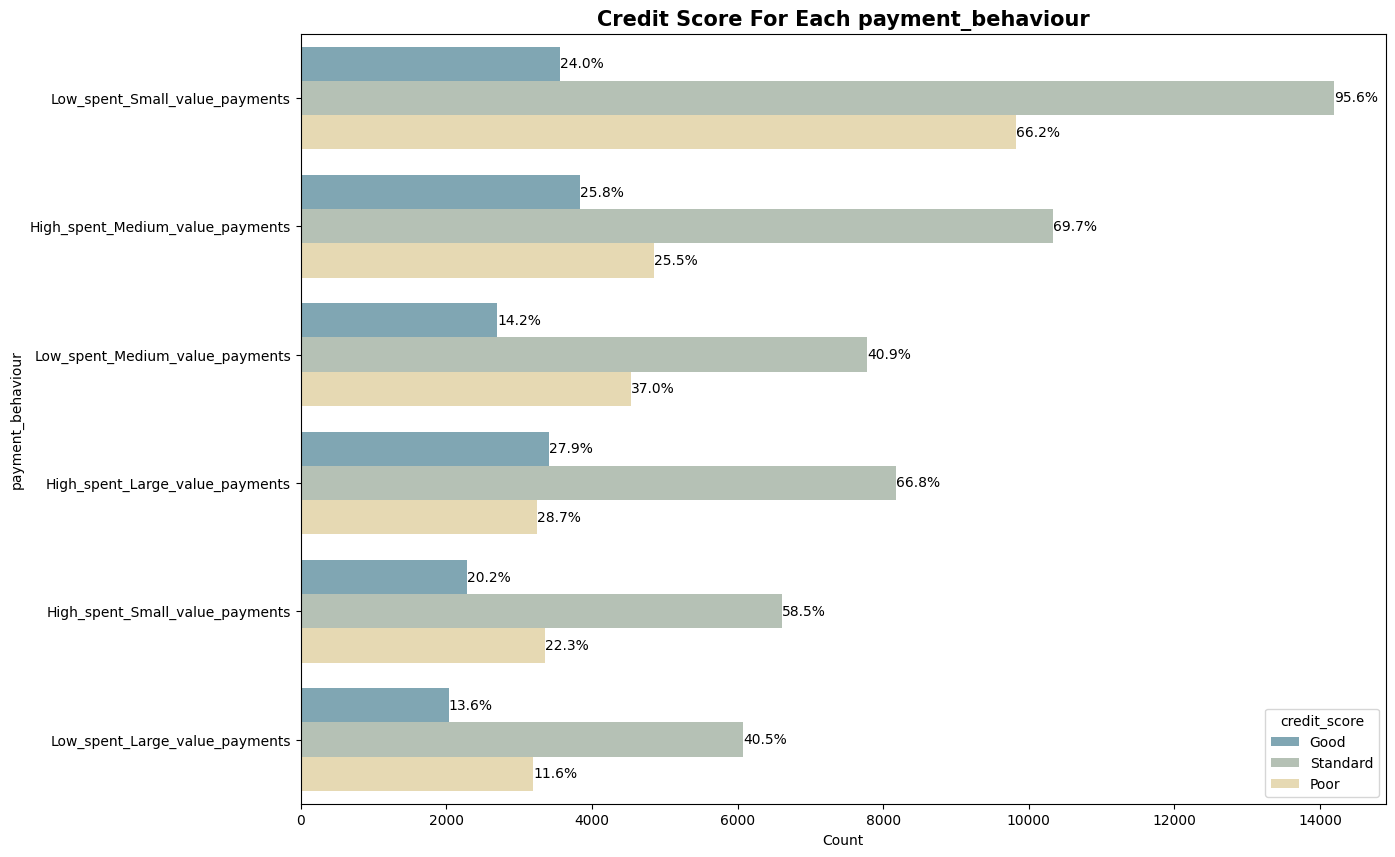

In [42]:
df_oc = df[['credit_score','payment_behaviour']]
df_oc['credit_score'] = df_oc['credit_score'].replace({0: 'Poor', 1:'Standard', 2:'Good'})

# total count for each `payment_behaviour`
totals = df.groupby('payment_behaviour').size()

plt.figure(figsize=(14, 10))
ax = sns.countplot(y='payment_behaviour',
                   hue='credit_score',
                   data=df_oc,
                   order=df_oc['payment_behaviour'].value_counts().index,
                   palette="blend:#7AB,#EDA")

for container in ax.containers:
    labels = []
    for bar, count in zip(container, container.datavalues):
      # Get the `payment_behaviour` category
      payment_bhv = int(bar.get_y())
      # Total for it's category
      total = totals[payment_bhv]
      # Count percentage
      percentage = f'{(count / total) * 100:.1f}%'
      labels.append(percentage)
    ax.bar_label(container, labels=labels)

plt.title('Credit Score For Each payment_behaviour',weight='bold',fontsize=15)
plt.xlabel('Count')
plt.ylabel('payment_behaviour')
plt.show()

**Interpretasi**: Dari semua "payment_behaviour" hanya "High_spent_Large_value_payments" yang memiliki "credit_score" "Good" lebih banyak dibanding "Bad".

### Perbandingan credit_score dengan num_bank_account

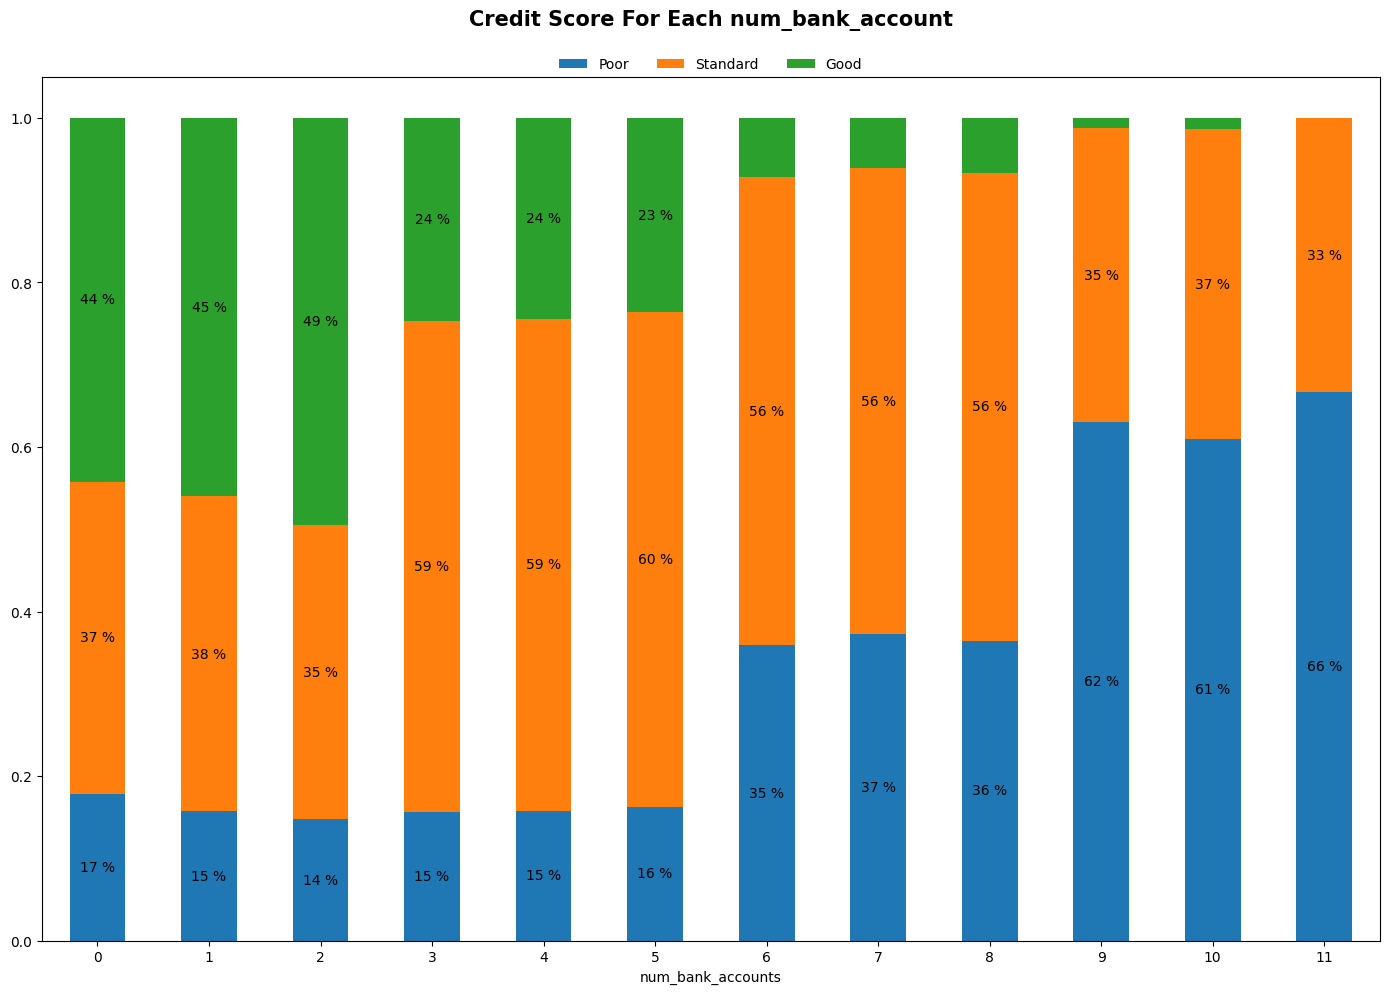

In [43]:
x_var, y_var = "num_bank_accounts","credit_score"
df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.columns = ['Poor','Standard','Good']
df_grouped.plot.bar(stacked=True, figsize=(14, 10))
plt.legend(
        bbox_to_anchor=(0.5, 1.0),
        loc="lower center",
        borderaxespad=0,
        frameon=False,
        ncol=3
      )

for ix, row in df_grouped.reset_index(drop=True).iterrows():
  cumulative = 0
  for element in row:
    if element == element and element > 0.1:
      plt.text(
          ix,
          cumulative + element / 2,
          f"{int(element * 100)} %",
          va="center",
          ha="center"
      )
    cumulative += element
plt.title('Credit Score For Each num_bank_account',weight='bold',fontsize=15,x=0.5, y=1.05)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Interpretasi**: Semakin sedikit jumlah rekening yang dimiliki nasabah, semakin baik credit score-nya.

## Feature Engineering

In [44]:
# Copy dataset
new_df = df.copy()

### Ordinal Encoding credit_mix, month, payment_behaviour

In [45]:
# Convert categorical data to number
or_enc = { # credit_mix
          'credit_mix':{'Bad':0, 'Standard':1, 'Good':2},
           # month
          'month':{'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
                  'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12},
           # payment_behaviour
          'payment_behaviour':{'Low_spent_Small_value_payments':0,'Low_spent_Medium_value_payments':1,
                               'Low_spent_Large_value_payments':2,'High_spent_Small_value_payments':3,
                               'High_spent_Medium_value_payments':4,'High_spent_Large_value_payments':5}
          }

for col in or_enc:
  new_df[col] = new_df[col].map(or_enc[col])

### Binary encoding payment_of_min_amount

In [46]:
# Convert Values No = 0, Yes = 1
new_df['payment_of_min_amount'] = new_df['payment_of_min_amount'].map({'No':0,'Yes':1})

### Binary encoding "type_of_loan" secara spesifik

In [47]:
# Buat set untuk semua jenis pinjaman
all_types = set()

# Pastikan nilai NaN diubah menjadi string kosong
new_df['type_of_loan'] = new_df['type_of_loan'].fillna("[]").astype(str)

for type_list in new_df['type_of_loan']:
    # Normalisasi string: hapus tanda kurung, kutip, dan spasi
    cleaned_list = type_list.replace('[', '').replace(']', '').replace("'", '').strip()
    # Pisahkan jenis pinjaman berdasarkan koma
    loan_types = cleaned_list.split(',')
    # Tambahkan setiap jenis pinjaman ke set
    for loan in loan_types:
        loan_cleaned = loan.strip().lower()
        if loan_cleaned and loan_cleaned != 'no loan':
            all_types.add(loan_cleaned)

# Buat kolom baru untuk setiap jenis pinjaman
for loan in all_types:
    col_name = f"tol_{loan.replace(' ', '_').replace('-', '_').replace('/', '_')}"
    new_df[col_name] = new_df['type_of_loan'].apply(lambda x: 1 if loan in x.lower() else 0)

In [48]:
# new_df['tol_debt_consolidation_loan'].value_counts()

### One-Hot Encoding occupation

In [49]:
new_df =  pd.get_dummies(new_df, columns=['occupation'])
new_df['occupation_Other'] = False

### Age group

In [50]:
new_df["age_youth"] = [1 if x < 30 else 0 for x in new_df['age']]
new_df["age_middle"] = [1 if x >= 30 and x <= 40 else 0 for x in new_df['age']]
new_df["age_senior"] = [1 if x > 40 else 0 for x in new_df['age']]

In [51]:
# new_df["age_middle"].value_counts()

### Debt to Annual income ratio

In [52]:
# Feature Engineering: outstanding_debt / annual_income
new_df['debt_income_ratio'] = new_df['outstanding_debt'] / new_df['annual_income']

### EMI to Monthly income ratio

In [53]:
# Feature Engineering: total_emi_per_month / monthly_inhand_salary
new_df['emi_salary_ratio'] = new_df['total_emi_per_month'] / new_df['monthly_inhand_salary']

### Drop Unused Columns

In [54]:
new_df = new_df.drop(columns=['id','name','customer_id','ssn','num_of_loan','type_of_loan','annual_income','age'])

In [55]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   month                        100000 non-null  int64  
 1   monthly_inhand_salary        100000 non-null  float64
 2   total_emi_per_month          100000 non-null  float64
 3   num_bank_accounts            100000 non-null  int64  
 4   num_credit_card              100000 non-null  int64  
 5   interest_rate                100000 non-null  int64  
 6   delay_from_due_date          100000 non-null  int64  
 7   num_of_delayed_payment       100000 non-null  int64  
 8   changed_credit_limit         100000 non-null  float64
 9   num_credit_inquiries         100000 non-null  int64  
 10  credit_mix                   100000 non-null  int64  
 11  outstanding_debt             100000 non-null  float64
 12  credit_utilization_ratio     100000 non-null  float64
 13  

## Train, Test Split

In [56]:
X = new_df.drop(columns=['credit_score'])
y = new_df['credit_score']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [57]:
X_train.shape,X_test.shape

((70000, 48), (30000, 48))

In [58]:
import joblib

# Setelah preprocessing pada X_train
feature_names = list(X_train.columns)

# Simpan fitur ke file
joblib.dump(feature_names, "feature_names.pkl")

['feature_names.pkl']

## EDA

### Histogram

In [ ]:
# X_train.hist(figsize=(16, 20), bins=50 ,color='skyblue')

### Boxplot

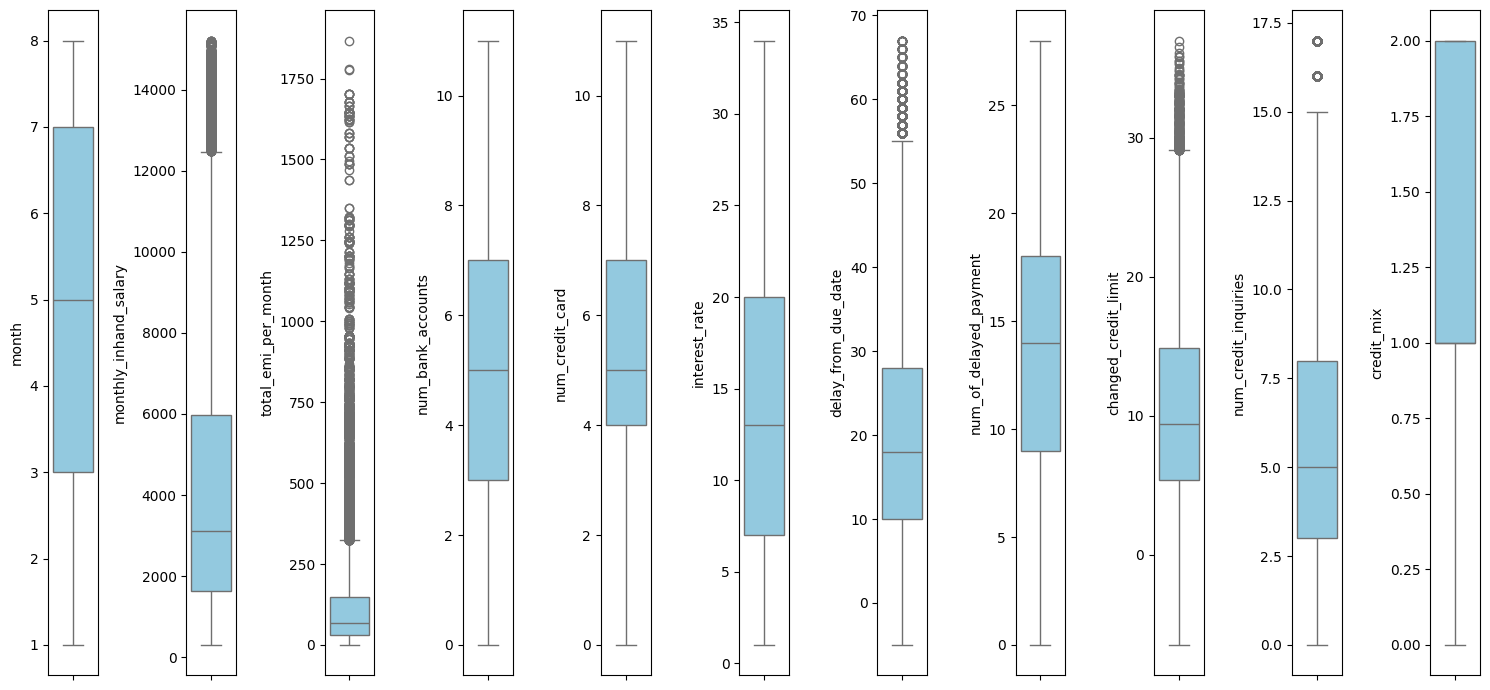

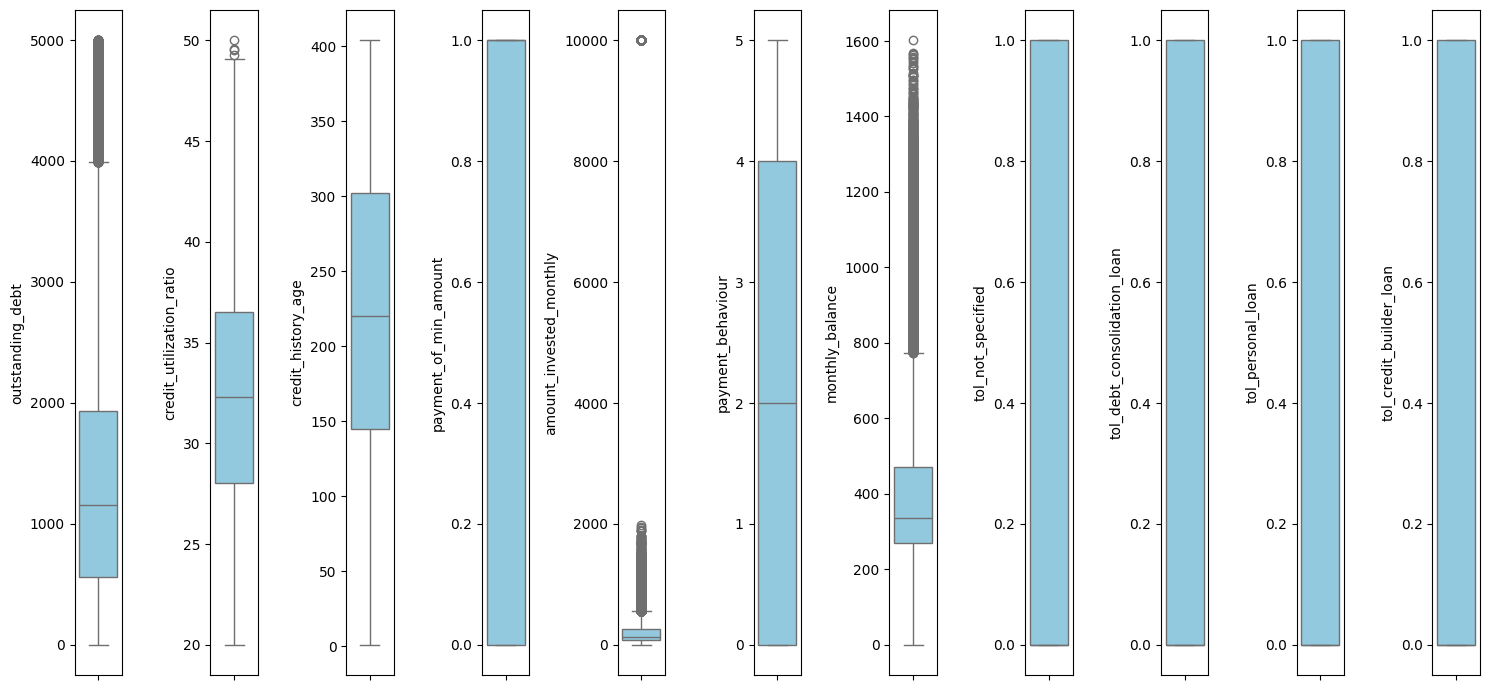

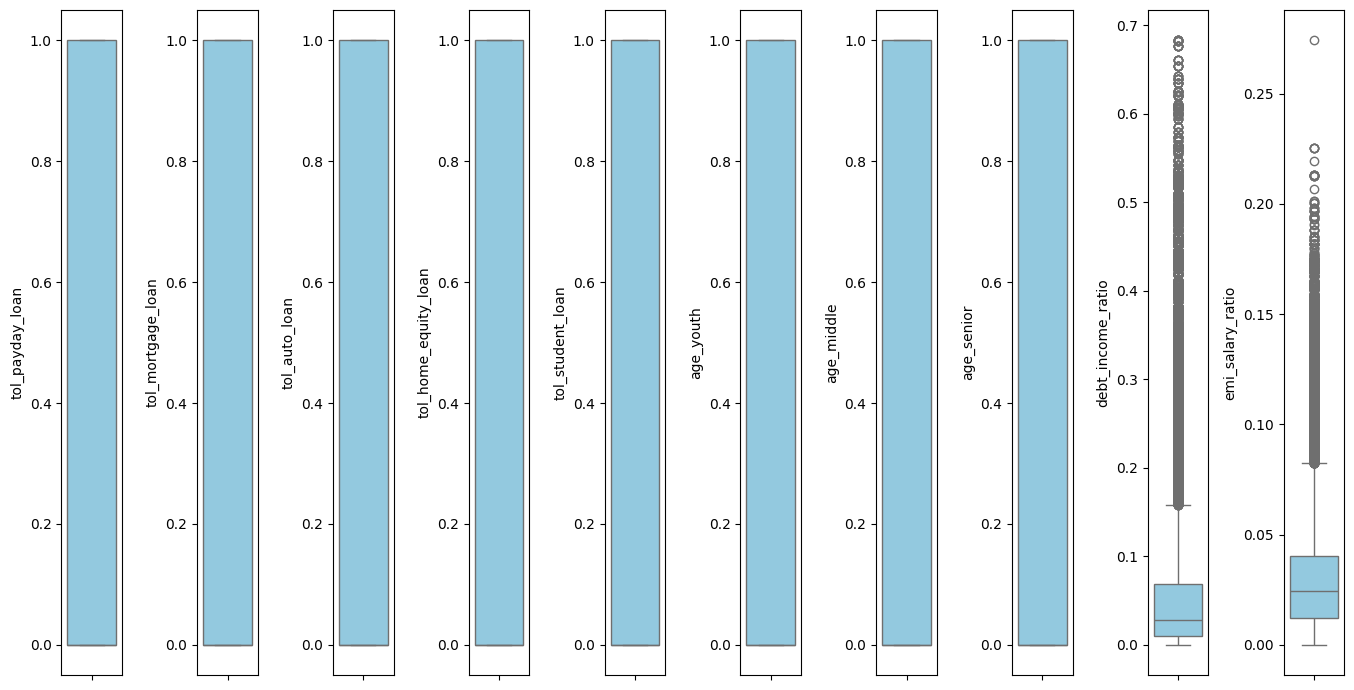

In [ ]:
num_cols = X_train.select_dtypes(include=np.number).columns.tolist()
num_split = np.array_split(num_cols, 3)
for i in range(len(num_split)):
  plt.figure(figsize=(15, 7))
  for n in range(len(num_split[i])):
    plt.subplot(1, 11, n+1)
    sns.boxplot(y=X_train[num_split[i][n]],color='skyblue',orient='v')
    plt.tight_layout()
# print(num_split)

### Outlier Handling

In [ ]:
# drop rows that amount_invested_monthly >= 10000.0
drop_idx = y_train[X_train['amount_invested_monthly'] >= 10000.0].index
X_train = X_train.drop(drop_idx)
y_train = y_train.drop(drop_idx)

In [ ]:
# Outlier Handling: Winsorizing
from scipy.stats.mstats import winsorize

ols_wns = ['monthly_inhand_salary','total_emi_per_month','delay_from_due_date','changed_credit_limit',
           'outstanding_debt','amount_invested_monthly','monthly_balance','debt_income_ratio','emi_salary_ratio']

low_lim = 0.05
upp_lim = 0.95

for ow in ols_wns:
  X_train[ow] = winsorize(X_train[ow], limits=(low_lim, 1-upp_lim))

In [ ]:
# Log Transform
# Natural Log Transform
# X_train['emi_salary_ratio'] = np.log(X_train['emi_salary_ratio'])

# Log10 Transform
# X_train['total_emi_per_month'] = np.log10(X_train['total_emi_per_month'])

In [ ]:
# Outlier Handling: IQR
ols_iqr = ['num_credit_inquiries','credit_utilization_ratio']

mask = pd.Series(True, index=X_train.index)

for oi in ols_iqr:
  Q1 = X_train[oi].quantile(0.25)
  Q3 = X_train[oi].quantile(0.75)

  IQR = Q3 - Q1
  min_grade = Q1 - 1.5*IQR
  max_grade = Q3 + 1.5*IQR

  mask &= (X_train[oi] > min_grade) & (X_train[oi] < max_grade)

X_train = X_train[mask]
y_train = y_train.loc[X_train.index]

In [ ]:
X_train.shape, y_train.shape

((66387, 48), (66387,))

### Outlier Recheck

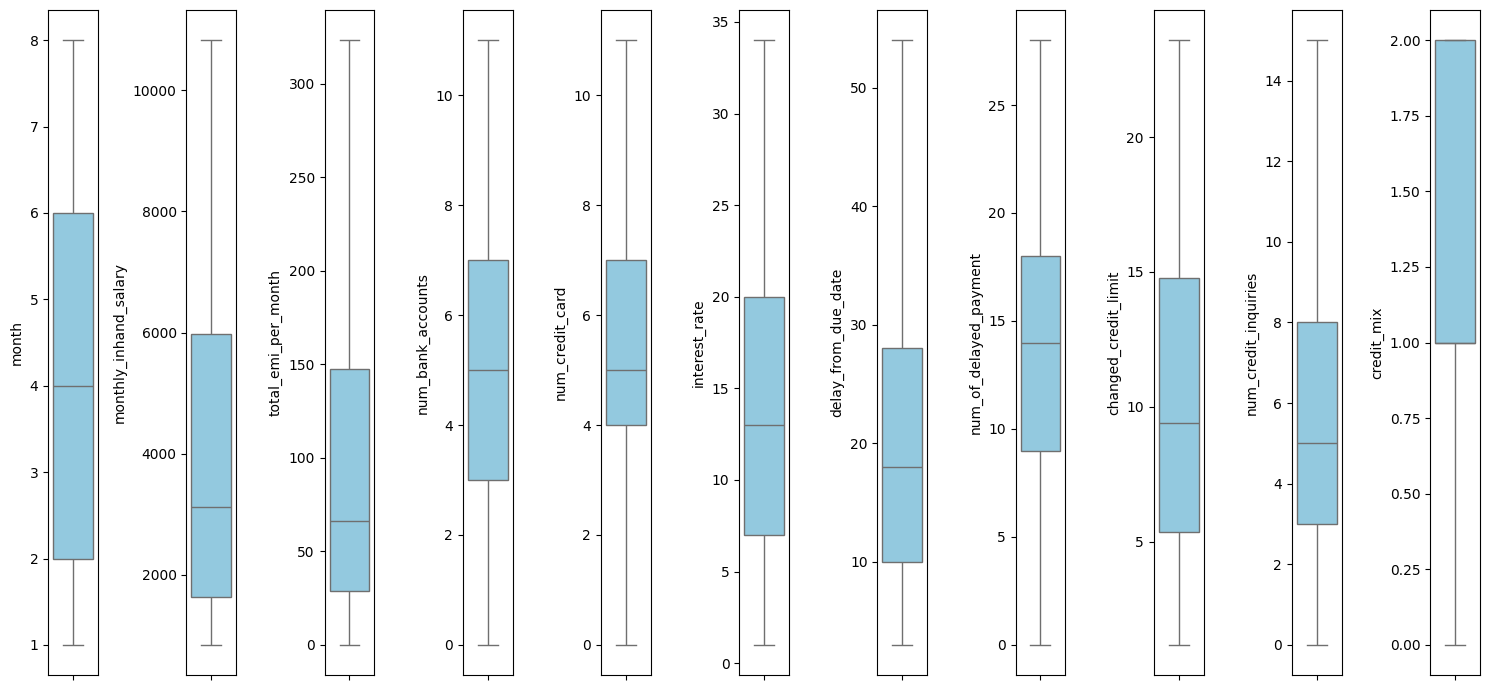

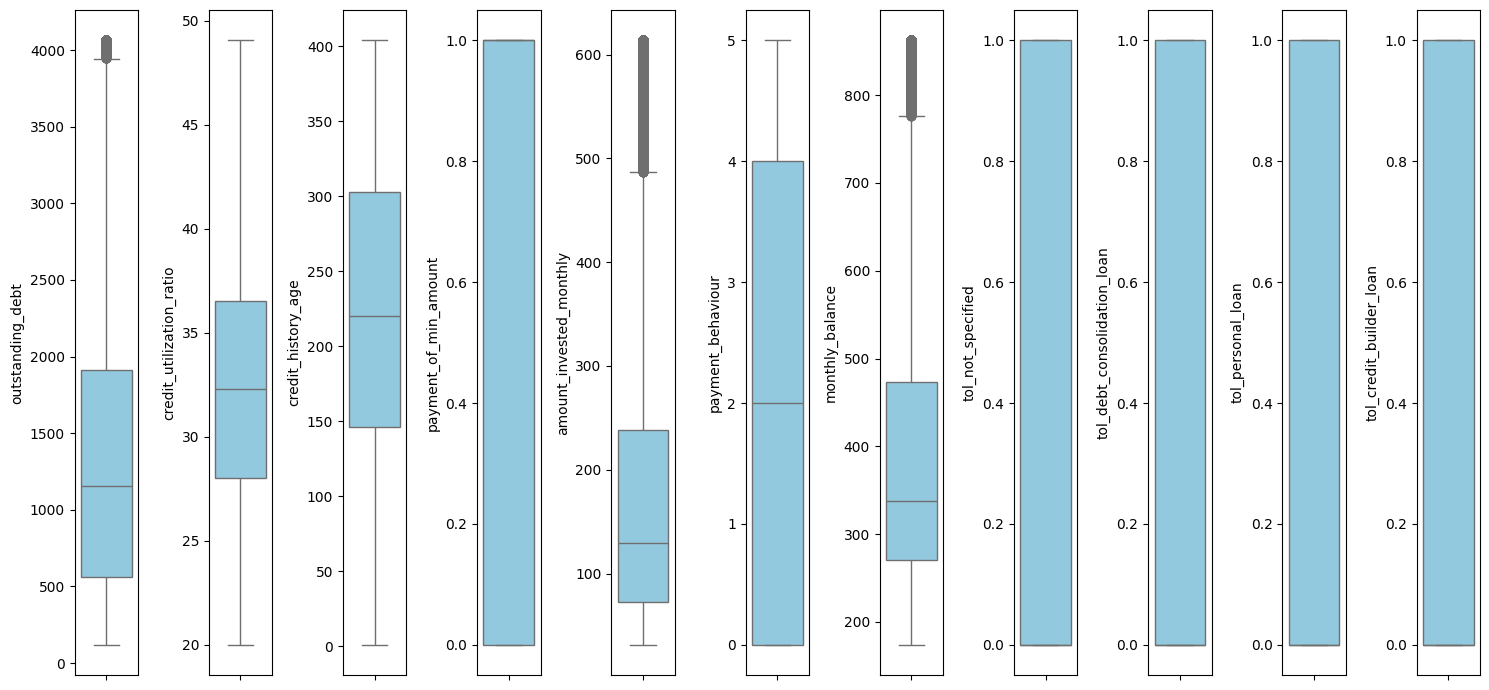

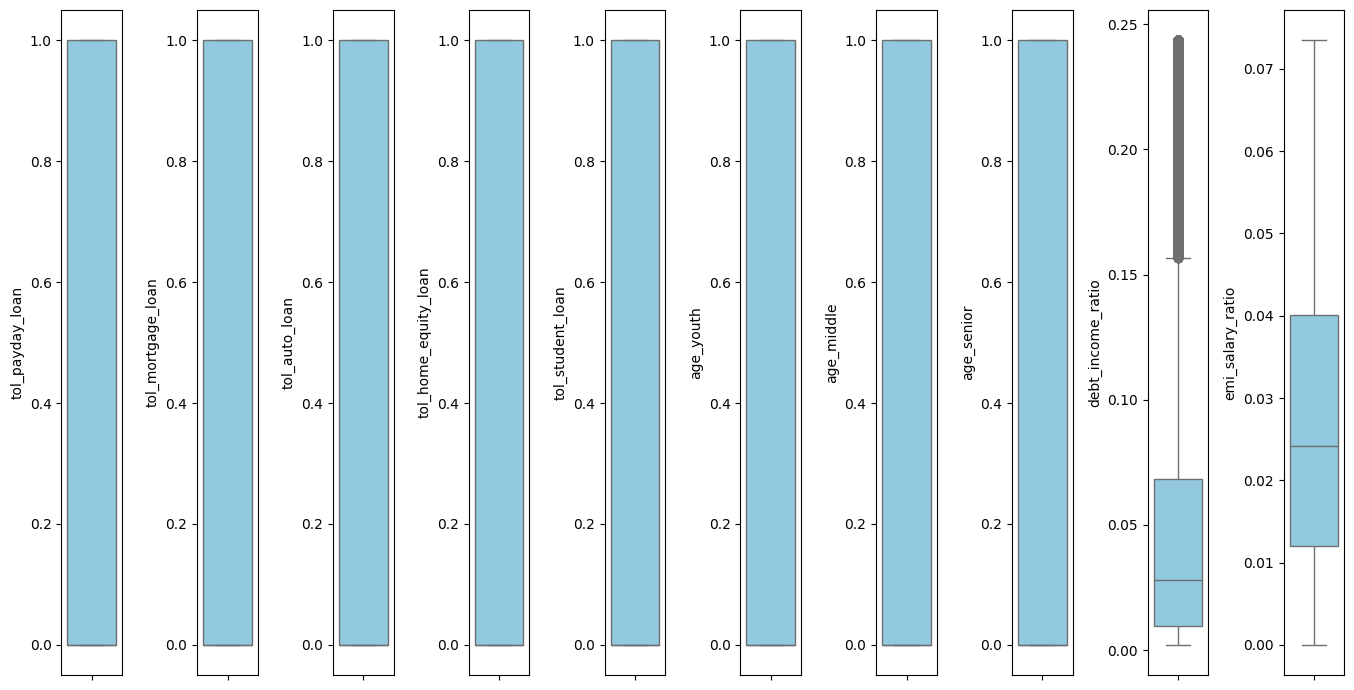

In [ ]:
num_split = np.array_split(num_cols, 3)
for i in range(len(num_split)):
  plt.figure(figsize=(15, 7))
  for n in range(len(num_split[i])):
    plt.subplot(1, 11, n+1)
    sns.boxplot(y=X_train[num_split[i][n]],color='skyblue',orient='v')
    plt.tight_layout()

### Multicolinearity Check

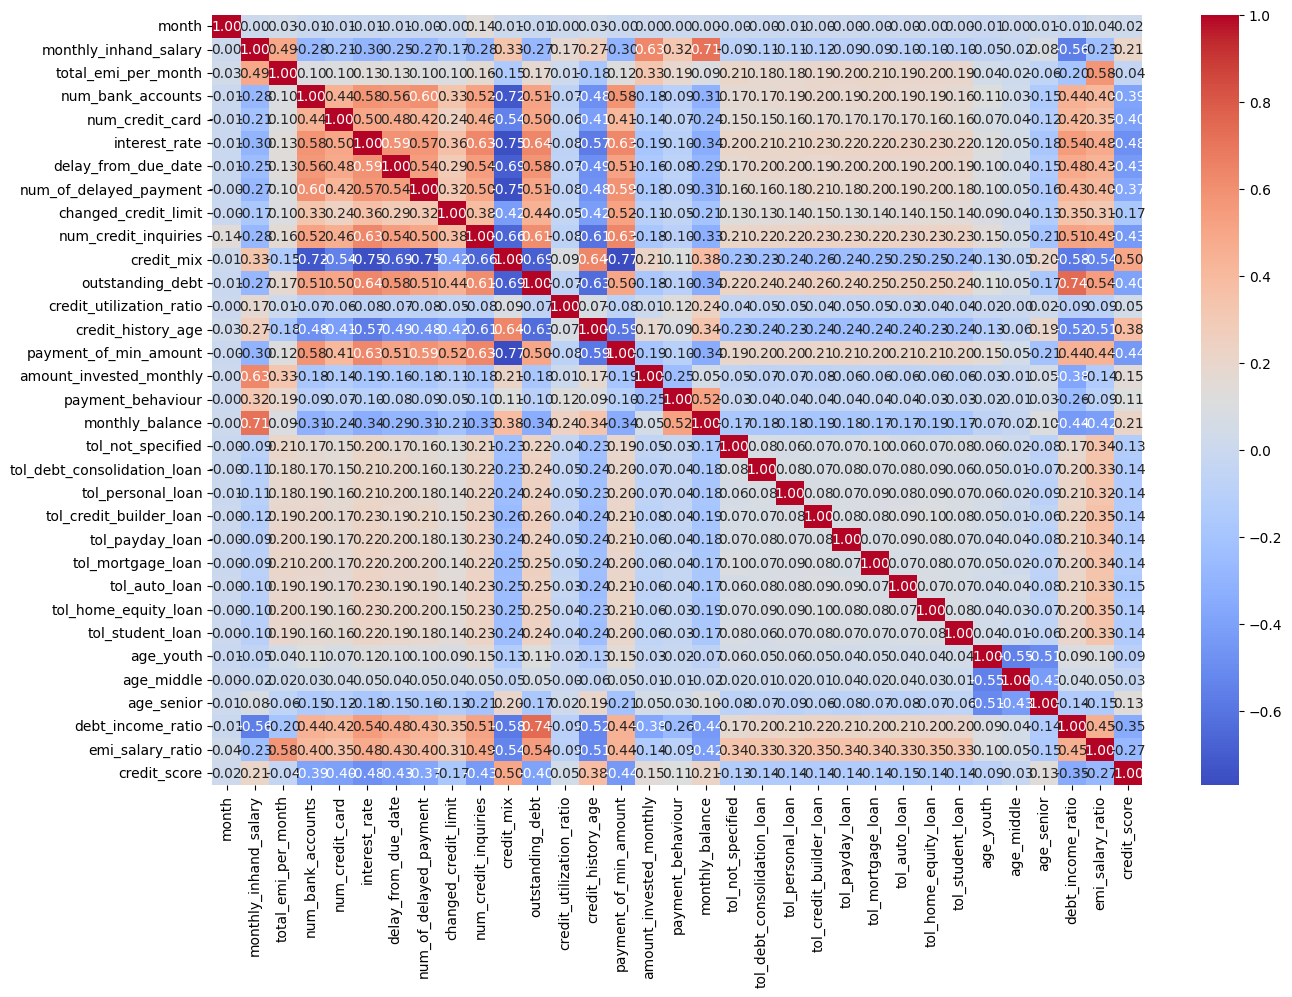

In [ ]:
# heatmap correlation
my_xtrain = X_train[num_cols]
price_train = pd.concat([my_xtrain, y_train], axis=1)
corr = price_train.corr()
# corr

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

## Modeling

Refererence ROC-AUC : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

### Feature Scaling

In [ ]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

### Oversampling SMOTE

In [ ]:
y_train.value_counts()

credit_score
1    35499
0    18961
2    11927
Name: count, dtype: int64

In [ ]:
# Oversamplinng: SMOTE
from imblearn.over_sampling import SMOTE

oversample = SMOTE(random_state=42)
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
y_train.value_counts()

credit_score
0    35499
1    35499
2    35499
Name: count, dtype: int64

In [ ]:
# Imbalance handling for XGBoost (Multiclass)
# Hitung bobot berdasarkan distribusi kelas
# class_counts = np.bincount(y_train)  # Frekuensi masing-masing kelas
# class_weights = {i: 1.0 / count for i, count in enumerate(class_counts)}

# # Buat array sample_weight
# sample_weights = np.array([class_weights[y] for y in y_train])

In [ ]:
# Models with Imbalanced handling
# mdls = [LogisticRegression(class_weight='balanced',random_state=42),
#         KNeighborsClassifier(),
#         XGBClassifier(sample_weights=sample_weights,random_state=42),
#         LGBMClassifier(random_state=42),
#         DecisionTreeClassifier(class_weight='balanced',random_state=42),
#         RandomForestClassifier(class_weight='balanced',random_state=42),
#         MLPClassifier(random_state=42)]

In [ ]:
# Models without imbalanced handling
mdls = [LogisticRegression(random_state=42),
        KNeighborsClassifier(),
        XGBClassifier(random_state=42),
        LGBMClassifier(random_state=42),
        DecisionTreeClassifier(random_state=42),
        RandomForestClassifier(random_state=42),
        MLPClassifier(random_state=42)]

In [ ]:
# evl_col = pd.DataFrame()
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []
auc_train = []
auc_test = []
models = []

for mdl in mdls:
  mdl.fit(X_train, y_train)
  pred_train = mdl.predict(X_train)
  pred_test = mdl.predict(X_test)
  # Prediction probability
  proba_train = mdl.predict_proba(X_train)
  proba_test = mdl.predict_proba(X_test)

  mdl_name = mdl.__class__.__name__

  recall_score_train = recall_score(y_train, pred_train, average='weighted')
  recall_score_test = recall_score(y_test, pred_test, average='weighted')

  precision_score_train = accuracy_score(y_train, pred_train)
  precision_score_test = accuracy_score(y_test, pred_test)

  f1_score_train = f1_score(y_train, pred_train, average='weighted')
  f1_score_test = f1_score(y_test, pred_test, average='weighted')

  auc_score_train = roc_auc_score(y_train, proba_train, multi_class='ovr', average='weighted')
  auc_score_test = roc_auc_score(y_test, proba_test, multi_class='ovr', average='weighted')

  recall_train.append(recall_score_train)
  recall_test.append(recall_score_test)
  precision_train.append(precision_score_train)
  precision_test.append(precision_score_test)
  f1_train.append(f1_score_train)
  f1_test.append(f1_score_test)
  auc_train.append(auc_score_train)
  auc_test.append(auc_score_test)
  models.append(mdl_name)

df_metrics = pd.DataFrame({'model':models,
                          'Recall_train':recall_train,
                          'Recall_test':recall_test,
                          'Precision_train':precision_train,
                          'Precision_test':precision_test,
                          'F1_train':f1_train,
                          'F1_test':f1_test,
                          'AUC_train':auc_train,
                          'AUC_test':auc_test})

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.062765 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2778
[LightGBM] [Info] Number of data points in the train set: 106497, number of used features: 47
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


In [ ]:
df_metrics.style.highlight_max(color='blue', axis=0)

**Interpretasi**: Berdasarkan hasil F1 Score, Random Forest memiliki score tertinggi dengan nilai `F1_test = 0.82855`. Selanjutnya akan melakukan hyperparameter tuning menggunakan Random Forest.

### RandomForest Before Hyperparameter Tuning

In [ ]:
rf_init = RandomForestClassifier(random_state=42)
rf_fit = rf_init.fit(X_train, y_train)
rf_test_pred = rf_fit.predict(X_test)

### RandomForest Confusion Matrix

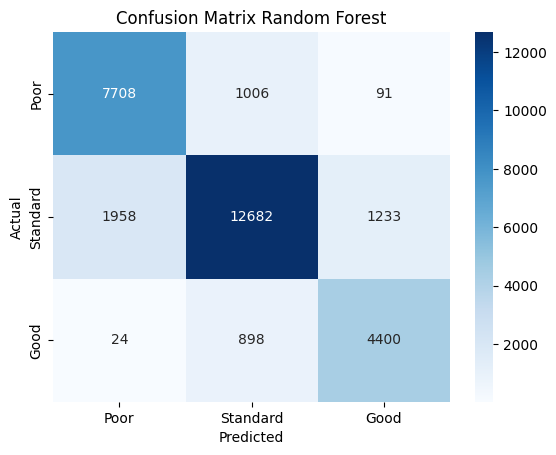

In [ ]:
# Confussion Metrics
target_names = ['Poor', 'Standard', 'Good']

cm = confusion_matrix(y_test, rf_test_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest")
plt.show()

## Hyperparameter Tuning

In [ ]:
# f1 = make_scorer(f1_score , average='weighted')
# rfc=RandomForestClassifier(random_state=42)
# param_grid = {
#     'n_estimators' :[10,20,30,40,50,60,70,80,90,100],
#     'criterion' :['gini', 'entropy'],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' :[10,20,30,40,50,60,70,80,90,100],
#     'min_samples_split' :[3,4,5,6,7,8,9,10,11,12,13,14,15],
#     'min_samples_leaf' :[3,4,5,6,7,8,9,10,11,12,13,14,15],
#     'max_features' :[1,10,25,50,75,100]
# }

# gscv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, scoring=f1)
# gscv_rfc.fit(X_train, y_train)

In [ ]:
# gscv_rfc.best_params_

### Finding n_estimator value

In [ ]:
estimator_list = [73,74,75,76,77,78]
n_estimators = [] # jumlah estimator
f1_scr = []

for estimator in estimator_list:
    rfc = RandomForestClassifier(n_estimators=estimator,random_state=42).fit(X_train, y_train)
    f1 = f1_score(y_test, rfc.predict(X_test), average='weighted')
    f1_scr.append(f1)
    n_estimators.append(estimator)

df_estimator = pd.DataFrame({'n_estimators':n_estimators,
                            'F1_score':f1_scr})

In [ ]:
df_estimator.style.highlight_max(color='blue', axis=0)

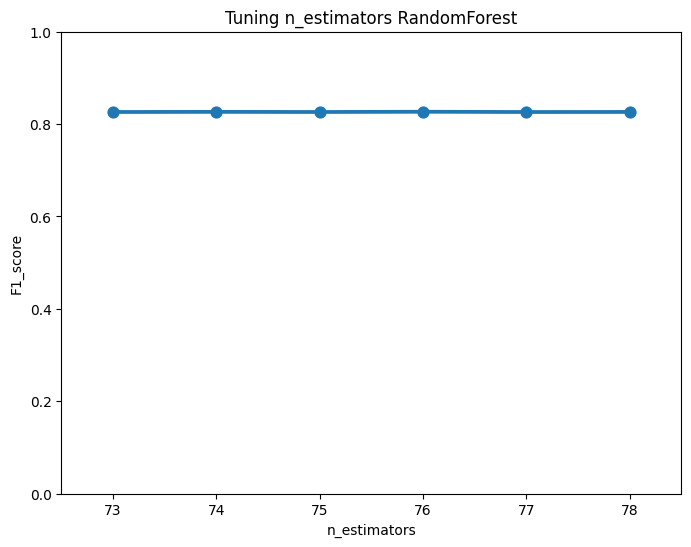

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_estimator,x='n_estimators',y='F1_score')
plt.title('Tuning n_estimators RandomForest')
plt.ylim(0, 1)
plt.show()

**Interpretasi**: n_estimator terbaik adalah "75" dengan `F1_score = 0.826465`. Selanjutnya n_estimator tidak akan digunakan, karena hasilnya lebih buruk dari yang sebelumnya `(F1_score = 0.826922)`.

### Finding min_samples_split value

In [ ]:
sample_split_list = [2,3,4,5,6,7,8,9,10]
min_samples_split = [] # jumlah minimum sample split
f1_scr = []

for min_split in sample_split_list:
    rfc = RandomForestClassifier(min_samples_split=min_split,
                                random_state=42).fit(X_train, y_train)
    f1 = f1_score(y_test, rfc.predict(X_test), average='weighted')
    f1_scr.append(f1)
    min_samples_split.append(min_split)

df_min_split = pd.DataFrame({'min_samples_split':min_samples_split,
                            'F1_score':f1_scr})

In [ ]:
df_min_split.style.highlight_max(color='blue', axis=0)

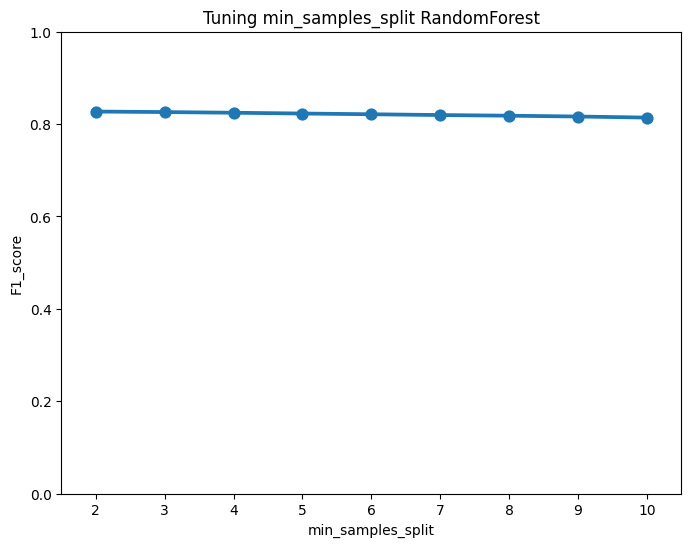

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_min_split,x='min_samples_split',y='F1_score')
plt.title('Tuning min_samples_split RandomForest')
plt.ylim(0, 1)
plt.show()

**Interpretasi**: Tidak ada peningkatan nilai F1_score ketika menggunakan `min_samples_split`. Selanjutnya parameter ini tidak akan digunakan.

### Finding min_samples_leaf value

In [ ]:
sample_leaf_list = [3,4,5,6,7,8,9,10]
min_samples_leaf = [] # jumlah minimum sample leaf
f1_scr = []

for leaf_split in sample_leaf_list:
  rfc = RandomForestClassifier(min_samples_leaf=leaf_split,
                              random_state=42).fit(X_train, y_train)
  f1 = f1_score(y_test, rfc.predict(X_test), average='weighted')
  f1_scr.append(f1)
  min_samples_leaf.append(leaf_split)

df_min_leaf = pd.DataFrame({'min_samples_leaf':min_samples_leaf,
                            'F1_score':f1_scr})

In [ ]:
df_min_leaf.style.highlight_max(color='blue', axis=0)

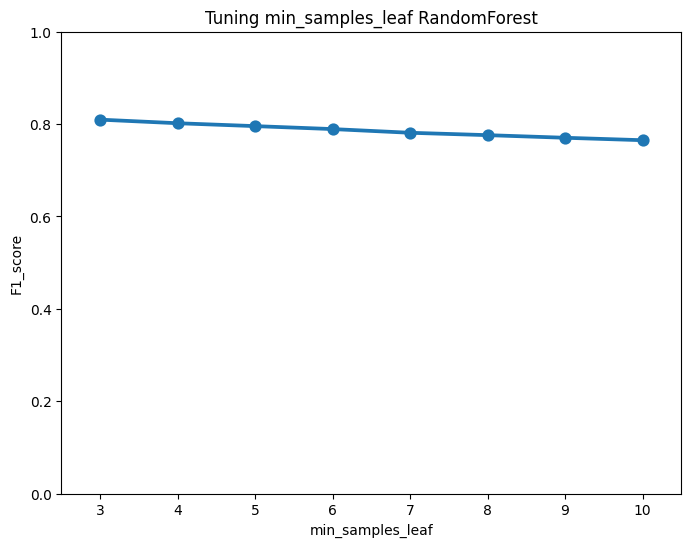

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_min_leaf,x='min_samples_leaf',y='F1_score')
plt.title('Tuning min_samples_leaf RandomForest')
plt.ylim(0, 1)
plt.show()

**Interpretasi**: Nilai F1 Score semakin menurun ketika menggunakan min_samples_leaf. Sehingga untuk selanjutnya parameter ini tidak digunakan.

### Finding max_features value

In [ ]:
feature_list = [3,4,5,6,7]
max_features = [] # jumlah min_samples_leaf
f1_scr = []

for feat in feature_list:
  rfc = RandomForestClassifier(max_features=feat,
                              random_state=42).fit(X_train, y_train)
  f1 = f1_score(y_test, rfc.predict(X_test), average='weighted')
  f1_scr.append(f1)
  max_features.append(feat)

df_feat = pd.DataFrame({'max_features':max_features,
                        'F1_score':f1_scr})

In [ ]:
df_feat.style.highlight_max(color='blue', axis=0)

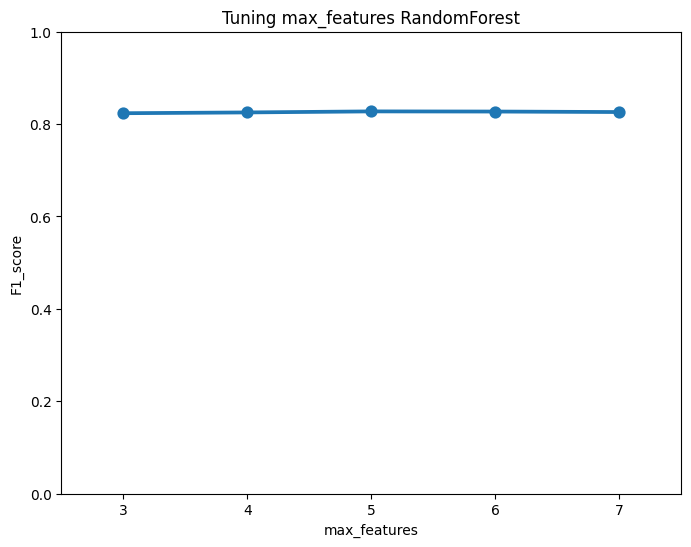

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_feat,x='max_features',y='F1_score')
plt.title('Tuning max_features RandomForest')
plt.ylim(0, 1)
plt.show()

**Interpretasi**: Ada peningkatan peningkatan performa menggunakan `max_features = 5`, `F1_score = 0.827242`, lebih besar dari sebelumnya `F1_score = 0.826922`.

### Finding Max Depth

In [ ]:
max_features = 5

In [ ]:
depth_list = [48,50,51,52,53,54,55]
max_depth = [] # jumlah min_samples_leaf
f1_scr = []

for depth in depth_list:
  rfc = RandomForestClassifier(max_depth=depth,
                              max_features=max_features,
                              random_state=42).fit(X_train, y_train)
  f1 = f1_score(y_test, rfc.predict(X_test), average='weighted')
  f1_scr.append(f1)
  max_depth.append(depth)

df_depth = pd.DataFrame({'max_depth':max_depth,
                        'F1_score':f1_scr})

In [ ]:
df_depth.style.highlight_max(color='blue', axis=0)

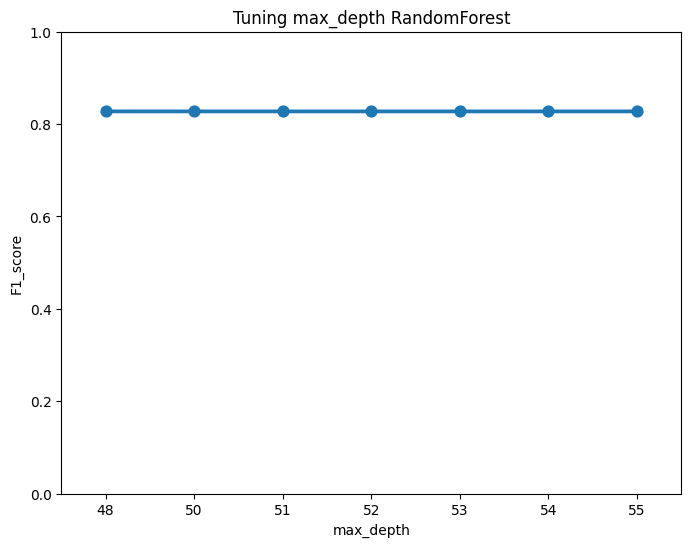

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_depth,x='max_depth',y='F1_score')
plt.title('Tuning max_depth RandomForest')
plt.ylim(0, 1)
plt.show()

**Interpretasi**: Ada peningkatan peningkatan performa menggunakan `max_depth = 48`, `F1_score = 0.827272`, lebih besar dari sebelumnya `F1_score = 0.827242`.

### Finding criterion

In [ ]:
max_features = 5
max_depth = 48

In [ ]:
ctiterion_list = ['gini','entropy']
criterion = [] # jumlah min_samples_leaf
f1_scr = []

for crt in ctiterion_list:
  rfc = RandomForestClassifier(criterion = crt,
                              max_depth=max_depth,
                              max_features=max_features,
                              random_state=42).fit(X_train, y_train)
  f1 = f1_score(y_test, rfc.predict(X_test), average='weighted')
  f1_scr.append(f1)
  criterion.append(crt)

df_crit = pd.DataFrame({'criterion':criterion,
                        'F1_score':f1_scr})

In [ ]:
df_crit.style.highlight_max(color='blue', axis=0)

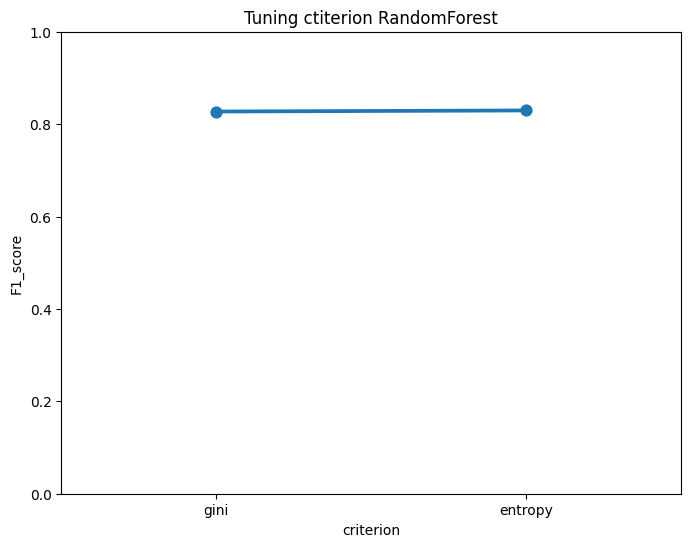

In [ ]:
plt.figure(figsize=(8,6))
sns.pointplot(data=df_crit,x='criterion',y='F1_score')
plt.title('Tuning ctiterion RandomForest')
plt.ylim(0, 1)
plt.show()

**Interpretasi**: Ada peningkatan peningkatan performa menggunakan `criterion = entropy`, `F1_score = 0.829606`, lebih besar dari sebelumnya `F1_score = 0.827272`.

## Evaluation

Model tidak menggunakan hyperparameter tuning, karena tidak ada peningkatan performa ketika dilakukan hyperparameter tuning. Jadi hanya akan membandingkan hasil dari beberapa model saja.

### Random Forest Classification

In [ ]:
# max_features = 5
# max_depth = 48
# criterion = 'entropy'

nat_rfc_clf = RandomForestClassifier(max_features = 5,
                                     max_depth = 48,
                                     criterion = 'entropy',
                                     random_state=42)
nat_rfc_fit = nat_rfc_clf.fit(X_train,y_train)
nat_rfc_pred = nat_rfc_fit.predict(X_test)
nat_rfc_pred_proba = nat_rfc_fit.predict_proba(X_test)

nat_rf_recall = recall_score(y_test, nat_rfc_pred, average='weighted')
nat_rf_precision = precision_score(y_test, nat_rfc_pred, average='weighted')
nat_rf_f1 = f1_score(y_test, nat_rfc_pred, average='weighted')
nat_rf_auc = roc_auc_score(y_test, nat_rfc_pred_proba, multi_class='ovr', average='weighted')

#### Calssification Report

In [ ]:
target_names = ['Poor', 'Standard', 'Good']
print(classification_report(y_test, nat_rfc_pred, target_names=target_names))

              precision    recall  f1-score   support

        Poor       0.80      0.88      0.83      8805
    Standard       0.87      0.80      0.84     15873
        Good       0.77      0.84      0.81      5322

    accuracy                           0.83     30000
   macro avg       0.81      0.84      0.83     30000
weighted avg       0.83      0.83      0.83     30000



**Interpretasi**: Karena data target yang tidak berimbang (Imbalanced data), maka akan menggunakan metrics f1-score. Dari prediksi yang telah dilakukan didapat bahwa untuk kelas `Good` memiliki nilai akurasi `81%`, sedangkan kelas `Standard` memiliki nilai akurasi `84%`, dan kelas `Poor` memiliki akurasi `83%`.

#### Confussion Matrix

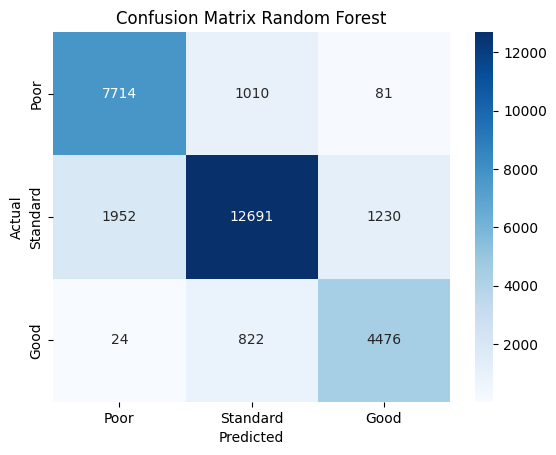

In [ ]:
# Confussion Metrics
cm = confusion_matrix(y_test, nat_rfc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Random Forest")
plt.show()

**Interpretasi**: Dari proses prediksi credit score menggunakan RandomForestClassifier didapat hasil: `Poor=7714`,`Standard=12691`,`Good=4476`

### XGBoost Classification

In [ ]:
nat_xgb_clf = XGBClassifier(random_state=42)
nat_xgb_fit = nat_xgb_clf.fit(X_train,y_train)
nat_xgb_pred = nat_xgb_fit.predict(X_test)
nat_xgb_pred_proba = nat_xgb_fit.predict_proba(X_test)

rf_recall = recall_score(y_test, nat_xgb_pred, average='weighted')
rf_precision = precision_score(y_test, nat_xgb_pred, average='weighted')
rf_f1 = f1_score(y_test, nat_xgb_pred, average='weighted')
rf_auc = roc_auc_score(y_test, nat_xgb_pred_proba, multi_class='ovr', average='weighted')

#### Calssification Report

In [ ]:
target_names = ['Poor', 'Standard', 'Good']
print(classification_report(y_test, nat_xgb_pred, target_names=target_names))

              precision    recall  f1-score   support

        Poor       0.75      0.78      0.76      8805
    Standard       0.82      0.74      0.78     15873
        Good       0.66      0.80      0.72      5322

    accuracy                           0.76     30000
   macro avg       0.74      0.77      0.75     30000
weighted avg       0.77      0.76      0.76     30000



**Interpretasi**: Karena data target yang tidak berimbang (Imbalanced data), maka akan menggunakan metrics `f1-score`. Dari prediksi yang telah dilakukan didapat bahwa untuk kelas `Good` memiliki nilai akurasi `72%`, sedangkan kelas `Standard` memiliki nilai akurasi `78%`, dan kelas `Poor` memiliki akurasi `76%`.

#### Confussion Matrix

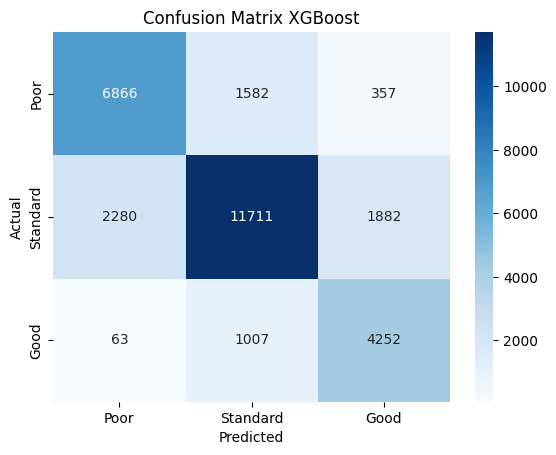

In [ ]:
# Confussion Metrics
cm = confusion_matrix(y_test, nat_xgb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix XGBoost")
plt.show()

**Interpretasi**: Dari proses prediksi credit score menggunakan XGBClassifier didapat hasil: `Poor=6866`,`Standard=11711`,`Good=4252`

### DecisionTree Classification

In [ ]:
nat_dtc_clf = DecisionTreeClassifier(random_state=42)
nat_dtc_fit = nat_dtc_clf.fit(X_train,y_train)
nat_dtc_pred = nat_dtc_fit.predict(X_test)
nat_dtc_pred_proba = nat_dtc_fit.predict_proba(X_test)

rf_recall = recall_score(y_test, nat_dtc_pred, average='weighted')
rf_precision = precision_score(y_test, nat_dtc_pred, average='weighted')
rf_f1 = f1_score(y_test, nat_dtc_pred, average='weighted')
rf_auc = roc_auc_score(y_test, nat_dtc_pred_proba, multi_class='ovr', average='weighted')

#### Calssification Report

In [ ]:
target_names = ['Poor', 'Standard', 'Good']
print(classification_report(y_test, nat_dtc_pred, target_names=target_names))

              precision    recall  f1-score   support

        Poor       0.71      0.73      0.72      8805
    Standard       0.77      0.74      0.76     15873
        Good       0.66      0.70      0.68      5322

    accuracy                           0.73     30000
   macro avg       0.71      0.72      0.72     30000
weighted avg       0.73      0.73      0.73     30000



**Interpretasi**: Karena data target yang tidak berimbang (Imbalanced data), maka akan menggunakan matrix `f1-score`. Dari prediksi yang telah dilakukan didapat bahwa untuk kelas `Good` memiliki nilai akurasi `68%`, sedangkan kelas `Standard` memiliki nilai akurasi `76%`, dan kelas `Poor` memiliki akurasi `72%`.

#### Confussion Matrix

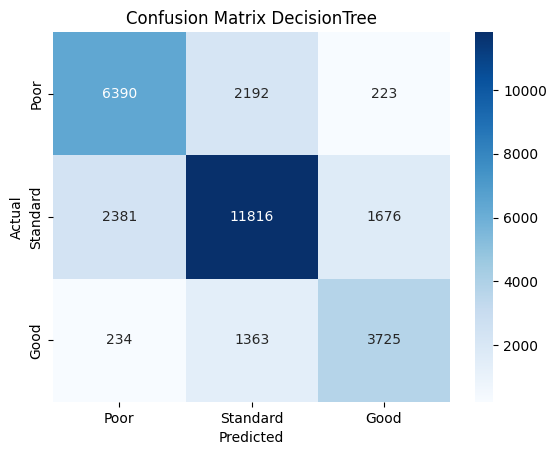

In [ ]:
# Confussion Matrix
cm = confusion_matrix(y_test, nat_dtc_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix DecisionTree")
plt.show()

**Interpretasi**: Dari proses prediksi credit score menggunakan DecisionTree didapat hasil: `Poor=6390`,`Standard=11816`,`Good=3726`.

### LightGBM Classifier

In [ ]:
nat_lgb_clf = LGBMClassifier(random_state=42)
nat_lgb_fit = nat_lgb_clf.fit(X_train,y_train)
nat_lgb_pred = nat_lgb_fit.predict(X_test)
nat_lgb_pred_proba = nat_lgb_fit.predict_proba(X_test)

rf_recall = recall_score(y_test, nat_lgb_pred, average='weighted')
rf_precision = precision_score(y_test, nat_lgb_pred, average='weighted')
rf_f1 = f1_score(y_test, nat_lgb_pred, average='weighted')
rf_auc = roc_auc_score(y_test, nat_lgb_pred_proba, multi_class='ovr', average='weighted')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.061826 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2778
[LightGBM] [Info] Number of data points in the train set: 106497, number of used features: 47
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


#### Calssification Report

In [ ]:
target_names = ['Poor', 'Standard', 'Good']
print(classification_report(y_test, nat_lgb_pred, target_names=target_names))

              precision    recall  f1-score   support

        Poor       0.71      0.75      0.73      8805
    Standard       0.81      0.69      0.74     15873
        Good       0.59      0.80      0.68      5322

    accuracy                           0.73     30000
   macro avg       0.70      0.75      0.72     30000
weighted avg       0.74      0.73      0.73     30000



**Interpretasi**: Karena data target yang tidak berimbang (Imbalanced data), maka akan menggunakan matrix `f1-score`. Dari prediksi yang telah dilakukan didapat bahwa untuk kelas `Good` memiliki nilai akurasi `68%`, sedangkan kelas `Standard` memiliki nilai akurasi `74%`, dan kelas `Poor` memiliki akurasi `73%`.

#### Confussion Matrix

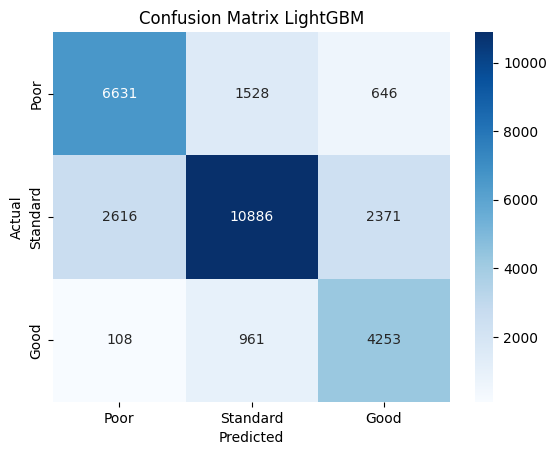

In [ ]:
# Confussion Matrix
cm = confusion_matrix(y_test, nat_lgb_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix LightGBM")
plt.show()

**Interpretasi**: Dari proses prediksi credit score menggunakan XGBClassifier didapat hasil: `Poor=6631`,`Standard=10886`,`Good=4253`.

### Export The model
Reference: https://saturncloud.io/blog/exporting-machine-learning-models-a-comprehensive-guide-for-data-scientists/

In [ ]:
# import pickle

# # Export your model to a file
# with open('classification_Score.pkl', 'wb') as f:
#     pickle.dump(nat_rfc_fit, f)

### ROC-AUC Metric

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


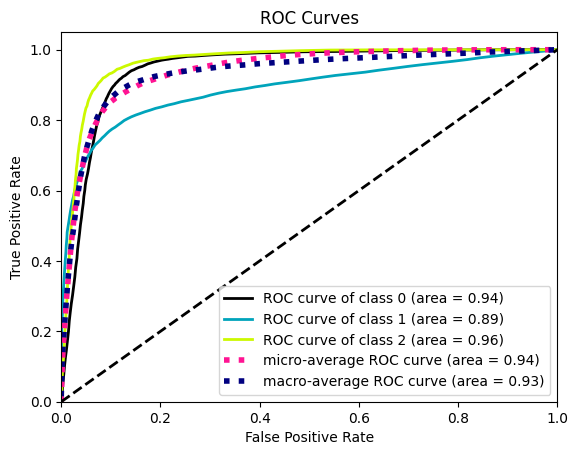

In [ ]:
# RandomForestClassifier result
skplt.metrics.plot_roc_curve(y_test, nat_rfc_pred_proba);

**Interpretasi**:
- `Class 0 = 0.94, Class 1 = 0.89, Class 2 = 0.96`: Secara keseluruhan, model sangat baik dalam memprediksi setiap kelas.
- `micro-average = 0.94`: Secara keseluruhan (mengabaikan keseimbangan data), model sangat baik dalam memprediksi.
- `Garis-hitam`: Merupakan prediksi tanpa menggunakan model, Karena semua kurva menjauh dari garis tersebut, berarti prediksi yang dilakukan jauh lebih baik dibanding tanpa model.

### Model Agnostic Method

In [ ]:
# initiate explainer for RandomForestClassifier model
score_rfc_exp = dx.Explainer(nat_rfc_clf, X_train, y_train, label = "RandomForest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 106497 rows 48 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 106497 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : RandomForest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7aa02e99de10> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.331, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.43, mean = 0.669, max = 2.0
  -> model_info        : package sklearn

A new explainer has been created!


#### Feature Importance

reference: https://haloryan.com/blog/apa-itu-log-loss-dalam-machine-learning

In [ ]:
# visualize permutation feature importance for RandomForestClassifier Model
score_rfc_exp.model_parts().plot();

#### Partial Dependence Plot

In [ ]:
# create partial dependence plot of RandomForestClassifier model
score_rfc_exp.model_profile().plot()

Calculating ceteris paribus:   0%|          | 0/48 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.   1.07 1.14 ... 7.86 7.93 8.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   6%|▋         | 3/48 [00:01<00:21,  2.14it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py:100: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.    0.11  0.22 ... 10.78 10.89 11.  ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.

Calculating ceteris paribus:   8%|▊         | 4/48 [00:01<00:20,  2.14it/s]/usr/local/lib/python3.10/dist-packages/dalex/predict_explanations/_ceteris_paribus/utils.py: